# Loading Files

In [ ]:
import pandas as pd
from google.colab import files

# Upload files
uploaded= files.upload()


Saving targets_download2024-10-24.xlsx to targets_download2024-10-24.xlsx
Saving yearly_full_release_long_format.csv to yearly_full_release_long_format.csv


In [ ]:
  df_csv=pd.read_csv("/content/yearly_full_release_long_format.csv") # reading the historical data

In [ ]:
df_csv.head()

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,0.19,NaN,NaN
1,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.03,NaN,NaN
2,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,0.03,NaN,NaN
3,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,0.19,NaN,NaN
4,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Renewables,GW,0.19,NaN,NaN


In [ ]:
#  Load the Excel File (with Multiple Sheets)
df_xlsx=pd.ExcelFile("/content/targets_download2024-10-24.xlsx") # reading the target data files
print(df_xlsx.sheet_names)

['raw_data_long', 'sources', 'capacity_target_wide', 'share_target_wide']


In [ ]:
# reading seprate sheets
df1=pd.read_excel(df_xlsx,sheet_name=df_xlsx.sheet_names[0])
df2=pd.read_excel(df_xlsx,sheet_name=df_xlsx.sheet_names[1])
df3=pd.read_excel(df_xlsx,sheet_name=df_xlsx.sheet_names[2])
df4=pd.read_excel(df_xlsx,sheet_name=df_xlsx.sheet_names[3])

In [ ]:
df1.head(),df2.head(),df3.head(),df4.head()

(  country_code country_name                 ember_region  target_year  \
 0          ARG    Argentina  Latin America and Caribbean         2030   
 1          ARG    Argentina  Latin America and Caribbean         2030   
 2          ARG    Argentina  Latin America and Caribbean         2030   
 3          ARG    Argentina  Latin America and Caribbean         2030   
 4          AUS    Australia                      Oceania         2030   
 
         fuel_category                   metric  value  source_id target_type  \
 0               Hydro        capacity_total_gw  13.21         37    Implicit   
 1  Rest of renewables        capacity_total_gw  19.26         37    Implicit   
 2               Hydro  share_of_generation_pct  21.70         37    Implicit   
 3  Rest of renewables  share_of_generation_pct  25.69         37    Implicit   
 4               Hydro        capacity_total_gw   7.21         28    Implicit   
 
    number_of_updates  collection_year confidence  g20  g20_exc_3 

#filtering the yearly_full_release_long_format table

In [ ]:
# Filter countries that are part of at least one of EU, G7, G20, or OECD
df_filtered= df_csv[(df_csv['EU']==1) | (df_csv['OECD']==1) | (df_csv['G20']==1) | (df_csv['G7']==1)]

In [ ]:
df_filtered.head()

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
11088,Argentina,ARG,2000,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,9.74,NaN,NaN
11089,Argentina,ARG,2000,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,9.61,NaN,NaN
11090,Argentina,ARG,2000,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,9.23,NaN,NaN
11091,Argentina,ARG,2000,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,8.73,NaN,NaN
11092,Argentina,ARG,2000,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Capacity,Aggregate fuel,Renewables,GW,8.74,NaN,NaN


In [ ]:
'''import pandas as pd
from google.colab import files

# Assuming df_filtered is your DataFrame# Save as CSV
df_filtered.to_csv('df_filtered.csv', index=False)

# Download the CSV file
files.download('df_filtered.csv')


# df_filtered.to_excel('df_filtered.xlsx', index=False)
# files.download('df_filtered.xlsx')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_filtered1=df_filtered[df_filtered["Year"]!=2000] # removing the rows which have data regardig year=2000

In [ ]:
df_filtered1=df_filtered1[df_filtered1["Unit"]!="%"] # removing the values in percentage. Considering only GW values rather than percentages

In [ ]:
'''import pandas as pd
from google.colab import files

# Save as CSV
df_filtered1.to_csv('df_filtered1.csv', index=False)

# Download the CSV file
files.download('df_filtered1.csv')


# df_filtered.to_excel('df_filtered.xlsx', index=False)
# files.download('df_filtered.xlsx')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_filtered1["Year"].dtype

dtype('int64')

In [ ]:
df_filtered1["Unit"].dtype

dtype('O')

In [ ]:
# Find all unique unit values
unique_units = df_filtered1["Unit"].unique()
print(" Unique Units in the Data:\n", unique_units)

 Unique Units in the Data:
 ['GW' 'TWh' 'MWh' 'mtCO2' 'gCO2/kWh']


In [ ]:
# --- Step 2: Handle missing values for the three value columns ---
# List of columns to fill missing values
value_columns = ['Value', 'YoY absolute change', 'YoY % change']
# Fill missing values with 0 in these columns
df_filtered1[value_columns] = df_filtered1[value_columns].fillna(0)

In [ ]:
df_filtered1["Value"].isnull().sum()

np.int64(0)

In [ ]:
df_filtered1["YoY absolute change"].isnull().sum()

np.int64(0)

In [ ]:
df_filtered1["YoY % change"].isnull().sum()

np.int64(0)

In [ ]:
'''import pandas as pd
from google.colab import files


# Save as CSV
df_filtered1.to_csv('df_filtered1.csv', index=False)

# Download the CSV file
files.download('df_filtered1.csv')


# df_filtered.to_excel('df_filtered.xlsx', index=False)
# files.download('df_filtered.xlsx')
'''

"import pandas as pd\nfrom google.colab import files\n\n# Assuming df_filtered is your DataFrame\n# Save as CSV\ndf_filtered1.to_csv('df_filtered1.csv', index=False)\n\n# Download the CSV file\nfiles.download('df_filtered1.csv')\n\n# If you prefer to save as Excel and download, uncomment the lines below:\n# df_filtered.to_excel('df_filtered.xlsx', index=False)\n# files.download('df_filtered.xlsx')\n"

In [ ]:
df_filtered1["Country code"].unique()

array(['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'BGR', 'CAN', 'CHL', 'CHN',
       'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA',
       'DEU', 'GRC', 'HUN', 'ISL', 'IND', 'IDN', 'IRL', 'ISR', 'ITA',
       'JPN', 'LVA', 'LTU', 'LUX', 'MLT', 'MEX', 'NLD', 'NZL', 'NOR',
       'POL', 'PRT', 'ROU', 'RUS', 'SAU', 'SVK', 'SVN', 'ZAF', 'KOR',
       'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA'], dtype=object)

In [ ]:
len(df_filtered1["Country code"].unique())

51

In [ ]:
df1["country_code"].unique()

array(['ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'DEU', 'EU', 'FRA', 'GBR',
       'IDN', 'IND', 'ITA', 'JPN', 'KOR', 'MEX', 'RUS', 'SAU', 'TUR',
       'USA', 'ZAF', 'ALB', 'ARE', 'AUT', 'BEL', 'BGD', 'BGR', 'BIH',
       'BWA', 'CHE', 'CHL', 'COL', 'CRI', 'CYP', 'CZE', 'DNK', 'DZA',
       'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'GEO', 'GHA', 'GRC',
       'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'JOR', 'KAZ', 'KEN', 'KHM',
       'LAO', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MKD', 'MLT',
       'MMR', 'MNE', 'MYS', 'NGA', 'NLD', 'NOR', 'NZL', 'PAK', 'PHL',
       'POL', 'PRT', 'ROU', 'RWA', 'SGP', 'SRB', 'SVK', 'SVN', 'SWE',
       'THA', 'TZA', 'UKR', 'UZB', 'VNM', 'XKX'], dtype=object)

In [ ]:
len(df1["country_code"].unique())

87

In [ ]:
countries=df_filtered1["Country code"].unique()

In [ ]:
df1_filtered= df1[df1["country_code"].isin(countries)]

In [ ]:
len(df1_filtered["country_code"].unique())

51

In [ ]:
df3["country_code"].unique()

array(['ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'DEU', 'EU', 'FRA', 'GBR',
       'IDN', 'IND', 'ITA', 'JPN', 'KOR', 'MEX', 'RUS', 'SAU', 'TUR',
       'USA', 'ZAF', 'ALB', 'ARE', 'AUT', 'BEL', 'BGD', 'BGR', 'BIH',
       'BWA', 'CHE', 'CHL', 'COL', 'CRI', 'CYP', 'CZE', 'DNK', 'DZA',
       'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'GEO', 'GHA', 'GRC',
       'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'JOR', 'KEN', 'KHM', 'LAO',
       'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MKD', 'MLT', 'MMR',
       'MNE', 'MYS', 'NGA', 'NLD', 'NOR', 'NZL', 'PAK', 'PHL', 'POL',
       'PRT', 'ROU', 'RWA', 'SGP', 'SRB', 'SVK', 'SVN', 'SWE', 'THA',
       'TZA', 'UKR', 'UZB', 'VNM', 'XKX'], dtype=object)

In [ ]:
len(df3["country_code"].unique())


86

# target datasets cleaning

In [ ]:
df3_filtered= df3[df3["country_code"].isin(countries)]

In [ ]:
len(df3_filtered["country_code"].unique())


51

In [ ]:
df4["country_code"].unique()


array(['ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'DEU', 'EU', 'FRA', 'GBR',
       'IDN', 'IND', 'ITA', 'JPN', 'KOR', 'MEX', 'SAU', 'TUR', 'USA',
       'ZAF', 'ALB', 'ARE', 'AUT', 'BEL', 'BGD', 'BGR', 'CHE', 'CHL',
       'CYP', 'DNK', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'GEO',
       'GRC', 'HRV', 'HUN', 'IRL', 'ISR', 'KAZ', 'KEN', 'LKA', 'LVA',
       'MDA', 'MKD', 'MNE', 'MYS', 'NGA', 'NLD', 'NOR', 'NZL', 'PAK',
       'PHL', 'POL', 'PRT', 'ROU', 'RWA', 'SRB', 'SVN', 'TZA', 'UKR',
       'UZB', 'VNM', 'XKX'], dtype=object)

In [ ]:
len(df4["country_code"].unique())


66

In [ ]:
df4_filtered= df4[df4["country_code"].isin(countries)]

In [ ]:
len(df4_filtered["country_code"].unique())

41

In [ ]:
df_filtered2 = df_filtered1[(df_filtered1["Category"] == "Capacity") & (df_filtered1["Subcategory"] == "Fuel")]
# considering only the renewable energry resources from the data

In [ ]:
'''import pandas as pd
from google.colab import files


# Save as CSV
df_filtered2.to_csv('df_filtered2.csv', index=False)

# Download the CSV file
files.download('df_filtered2.csv')


# df_filtered.to_excel('df_filtered.xlsx', index=False)
# files.download('df_filtered.xlsx')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_filtered2["Variable"].unique()

array(['Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Other Fossil',
       'Solar', 'Wind', 'Other Renewables'], dtype=object)

In [ ]:
len(df_filtered2["Variable"].unique())

9

In [ ]:
df1_filtered['fuel_category'].unique()

array(['Hydro', 'Rest of renewables', 'Offshore Wind', 'Solar', 'Wind',
       'Bioenergy', 'Other Renewables', 'Hydro, bio and other renewables',
       'Onshore Wind', 'Renewables'], dtype=object)

In [ ]:
len(df1_filtered['fuel_category'].unique())

10

In [ ]:
!pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 9.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Save DataFrames into one Excel file with multiple sheets
with pd.ExcelWriter("filtered_data.xlsx", engine="openpyxl") as writer:

    df1_filtered.to_excel(writer, sheet_name="DF1", index=False)
    #df2_filtered.to_excel(writer, sheet_name="DF2", index=False)
    df3_filtered.to_excel(writer, sheet_name="DF3", index=False)
    df4_filtered.to_excel(writer, sheet_name="DF4", index=False)

print("Excel file with multiple sheets saved successfully!")


Excel file with multiple sheets saved successfully!


In [ ]:
df_filtered2['Country code'].unique()

array(['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'BGR', 'CAN', 'CHL', 'CHN',
       'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA',
       'DEU', 'GRC', 'HUN', 'ISL', 'IND', 'IDN', 'IRL', 'ISR', 'ITA',
       'JPN', 'LVA', 'LTU', 'LUX', 'MLT', 'MEX', 'NLD', 'NZL', 'NOR',
       'POL', 'PRT', 'ROU', 'RUS', 'SAU', 'SVK', 'SVN', 'ZAF', 'KOR',
       'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA'], dtype=object)

In [ ]:
df3_filtered['country_code'].unique() in df_filtered2['Country code'].unique()

True

In [ ]:
df_filtered2['Country code'].unique() in df3_filtered['country_code'].unique()

True

In [ ]:


df_merged = pd.merge(df_filtered2, df3_filtered[['country_code', 'res_capacity_target']],
                     left_on='Country code', right_on='country_code', how='left')

# Display the merged DataFrame
print(df_merged.head())

'''
# Save the merged DataFrame to a CSV file
df_merged.to_csv('df_merged.csv', index=False)

# Download the CSV file
files.download('df_merged.csv')
'''

        Area Country code  Year Area type      Continent  \
0  Argentina          ARG  2001   Country  South America   
1  Argentina          ARG  2001   Country  South America   
2  Argentina          ARG  2001   Country  South America   
3  Argentina          ARG  2001   Country  South America   
4  Argentina          ARG  2001   Country  South America   

                  Ember region   EU  OECD  G20   G7  ASEAN  Category  \
0  Latin America and Caribbean  0.0   0.0  1.0  0.0    0.0  Capacity   
1  Latin America and Caribbean  0.0   0.0  1.0  0.0    0.0  Capacity   
2  Latin America and Caribbean  0.0   0.0  1.0  0.0    0.0  Capacity   
3  Latin America and Caribbean  0.0   0.0  1.0  0.0    0.0  Capacity   
4  Latin America and Caribbean  0.0   0.0  1.0  0.0    0.0  Capacity   

  Subcategory   Variable Unit  Value  YoY absolute change  YoY % change  \
0        Fuel  Bioenergy   GW   0.12                 0.00          0.00   
1        Fuel       Coal   GW   0.38                 0.0

"\n# Save the merged DataFrame to a CSV file\ndf_merged.to_csv('df_merged.csv', index=False)\n\n# Download the CSV file\nfiles.download('df_merged.csv')\n"

In [ ]:

# Assuming df_merged is your DataFrame
renewable_sources = ['Bioenergy', 'Hydro','Solar', 'Wind', 'Other Renewables']

df_merged1 = df_merged[df_merged['Variable'].isin(renewable_sources)]

In [ ]:
# Save the updated DataFrame to a CSV file
df_merged1.to_csv('df_merged_renewable.csv', index=False)

# Download the CSV file
files.download('df_merged_renewable.csv')

In [ ]:
df_merged1["Variable"].unique()

array(['Bioenergy', 'Hydro', 'Solar', 'Wind', 'Other Renewables'],
      dtype=object)

In [ ]:
# Group by 'Country code', 'Year', and sum the 'Value' column
df_merged1['Yearly_energy_sum'] = df_merged1.groupby(['Country code', 'Year'])['Value'].transform('sum')

# Print the updated DataFrame
df_merged1

<ipython-input-51-d652c6bb7157>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged1['Yearly_energy_sum'] = df_merged1.groupby(['Country code', 'Year'])['Value'].transform('sum')


,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,...,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change,country_code,res_capacity_target,Yearly_energy_sum
0,Argentina,ARG,2001,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,...,Capacity,Fuel,Bioenergy,GW,0.12,0.00,0.00,ARG,32.47,8.76
3,Argentina,ARG,2001,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,...,Capacity,Fuel,Hydro,GW,8.64,0.03,0.35,ARG,32.47,8.76
6,Argentina,ARG,2001,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,...,Capacity,Fuel,Solar,GW,0.00,0.00,0.00,ARG,32.47,8.76
7,Argentina,ARG,2001,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,...,Capacity,Fuel,Wind,GW,0.00,-0.01,-100.00,ARG,32.47,8.76
8,Argentina,ARG,2002,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,...,Capacity,Fuel,Bioenergy,GW,0.13,0.01,8.33,ARG,32.47,8.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,United States of America,USA,2023,Country,North America,North America,0.0,1.0,1.0,1.0,...,Capacity,Fuel,Bioenergy,GW,9.96,-0.12,-1.19,USA,938.00,387.55
10127,United States of America,USA,2023,Country,North America,North America,0.0,1.0,1.0,1.0,...,Capacity,Fuel,Hydro,GW,86.66,0.03,0.03,USA,938.00,387.55
10130,United States of America,USA,2023,Country,North America,North America,0.0,1.0,1.0,1.0,...,Capacity,Fuel,Other Renewables,GW,3.70,0.03,0.82,USA,938.00,387.55
10131,United States of America,USA,2023,Country,North America,North America,0.0,1.0,1.0,1.0,...,Capacity,Fuel,Solar,GW,139.21,24.85,21.73,USA,938.00,387.55


In [ ]:
# Save the updated DataFrame to a CSV file
df_merged1.to_csv('df_merged_renewable.csv', index=False)

# Download the CSV file
files.download('df_merged_renewable.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Filter for the year 2023
df_2023 = df_merged1[df_merged1['Year'] == 2023]

# Group by relevant columns and calculate the achievement percentage
df_achievement = df_2023.groupby(['Area', 'Country code', 'Area type', 'Continent', 'Ember region']) \
    .agg({'Yearly_energy_sum': 'first', 'res_capacity_target': 'first'}) \
    .reset_index()

# Calculate the achievement in percentage
df_achievement['Achievemnet in percentage'] = (df_achievement['Yearly_energy_sum'] / df_achievement['res_capacity_target']) * 100

# Drop unnecessary columns  (e.g., Yearly_energy_sum, res_capacity_target)
df_achievement = df_achievement[['Area', 'Country code', 'Area type', 'Continent', 'Ember region', 'Achievemnet in percentage']]

# Display the result
df_achievement

,Area,Country code,Area type,Continent,Ember region,Achievemnet in percentage
0,Argentina,ARG,Country,South America,Latin America and Caribbean,48.937481
1,Australia,AUS,Country,Oceania,Oceania,58.779617
2,Austria,AUT,Country,Europe,Europe,74.845938
3,Belgium,BEL,Country,Europe,Europe,63.326316
4,Brazil,BRA,Country,South America,Latin America and Caribbean,89.321059
5,Bulgaria,BGR,Country,Europe,Europe,57.064220
6,Canada,CAN,Country,North America,North America,87.204172
7,Chile,CHL,Country,South America,Latin America and Caribbean,54.817708
8,China,CHN,Country,Asia,Asia,58.544494
9,Colombia,COL,Country,South America,Latin America and Caribbean,75.052632


In [ ]:
# You can also save the result to a new CSV or Excel file if needed.
df_achievement.to_csv('achievement_2023.csv', index=False)

In [ ]:
# Download the CSV file
files.download('achievement_2023.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model building

# Considering the top 5 influencing countries in the world.

In [ ]:
# Create separate DataFrames for each country
countries = ['CHN', 'USA', 'IND', 'BRA', 'CAN']
country_dfs = {}

for country in countries:
  df_country = df_merged1[df_merged1['Country code'] == country].copy()

  # Pivot the data to create the columns you specified
  df_country = df_country.pivot_table(
      index=['Area', 'Country code', 'Year', 'Area type', 'Continent', 'Ember region'],
      columns='Variable',
      values='Value'
  ).reset_index()

  # Rename columns for better readability
  df_country.rename(columns={
      'Solar': 'Solar',
      'Solar YoY % change': 'Solar YoY % change',
      'Solar YoY absolute change': 'Solar YoY absolute change',
      'Wind': 'Wind',
      'Wind YoY % change': 'Wind YoY % change',
      'Wind YoY absolute change': 'Wind YoY absolute change',
      'Hydro': 'Hydro',
      'Hydro YoY % change': 'Hydro YoY % change',
      'Hydro YoY absolute change': 'Hydro YoY absolute change',
      'Bioenergy': 'Bioenergy',
      'Bioenergy YoY % change': 'Bioenergy YoY % change',
      'Bioenergy YoY absolute change': 'Bioenergy YoY absolute change'
  }, inplace=True)

  # Add unit value columns
  # Replace these with your actual calculation logic
  df_country['Solar Unit Value'] = df_country['Solar'] * 1
  df_country['Wind Unit Value'] = df_country['Wind'] * 1
  df_country['Hydro Unit Value'] = df_country['Hydro'] * 1
  df_country['Bioenergy Unit Value'] = df_country['Bioenergy'] * 1

  # Store the DataFrame for the current country
  country_dfs[country] = df_country

# Now you have individual DataFrames for each country named 'df_CHN', 'df_USA', etc.


#  Print the head of the 'CHN' DataFrame
country_dfs['CHN'].head()

Variable,Area,Country code,Year,Area type,Continent,Ember region,Bioenergy,Hydro,Solar,Wind,Solar Unit Value,Wind Unit Value,Hydro Unit Value,Bioenergy Unit Value
0,China,CHN,2001,Country,Asia,Asia,1.12,77.70,0.04,0.38,0.04,0.38,77.70,1.12
1,China,CHN,2002,Country,Asia,Asia,1.65,81.07,0.06,0.45,0.06,0.45,81.07,1.65
2,China,CHN,2003,Country,Asia,Asia,1.85,89.90,0.07,0.55,0.07,0.55,89.90,1.85
3,China,CHN,2004,Country,Asia,Asia,1.90,100.24,0.08,0.76,0.08,0.76,100.24,1.90
4,China,CHN,2005,Country,Asia,Asia,2.00,111.79,0.14,1.06,0.14,1.06,111.79,2.00


In [ ]:
# Create an empty list to store the processed rows
new_rows = []

# Iterate through unique combinations of Area, Country code, and Year
for (area, country_code, year) in df_merged1.groupby(['Area', 'Country code', 'Year']).groups:
    # Get the data for the current combination
    group = df_merged1[(df_merged1['Area'] == area) & (df_merged1['Country code'] == country_code) & (df_merged1['Year'] == year)]

    # Create a dictionary to store the values for the new row
    row_data = {
        'Area': area,
        'Country code': country_code,
        'Year': year,
        'Ember region': group['Ember region'].iloc[0] #Take the first value
    }

    # Iterate through the variables and extract the necessary values
    for variable in ['Bioenergy', 'Solar', 'Wind', 'Hydro']:
        # Filter the data for current variable
        variable_data = group[group['Variable'] == variable]

        if not variable_data.empty:
            row_data[f"{variable} Unit Value"] = variable_data['Value'].iloc[0]
            row_data[f"{variable} YoY absolute change"] = variable_data['YoY absolute change'].iloc[0]
            row_data[f"{variable} YoY % change"] = variable_data['YoY % change'].iloc[0]
            row_data["Variable"] = variable
            row_data["Unit"] = variable_data['Unit'].iloc[0]
        else:
            row_data[f"{variable} Unit Value"] = None
            row_data[f"{variable} YoY absolute change"] = None
            row_data[f"{variable} YoY % change"] = None

    # Append the new row to the list
    new_rows.append(row_data)

# Create the new DataFrame from the list of dictionaries
new_df = pd.DataFrame(new_rows)

# Display the new DataFrame
new_df[new_df['Area']=='China']

In [ ]:
new_df.drop(columns=['Variable','Unit'],inplace=True)
# Display the new DataFrame
new_df[new_df['Area']=='China']

,Area,Country code,Year,Ember region,Bioenergy Unit Value,Bioenergy YoY absolute change,Bioenergy YoY % change,Solar Unit Value,Solar YoY absolute change,Solar YoY % change,Wind Unit Value,Wind YoY absolute change,Wind YoY % change,Hydro Unit Value,Hydro YoY absolute change,Hydro YoY % change
184,China,CHN,2001,Asia,1.12,0.02,1.82,0.04,0.01,33.33,0.38,0.04,11.76,77.70,3.35,4.51
185,China,CHN,2002,Asia,1.65,0.53,47.32,0.06,0.02,50.00,0.45,0.07,18.42,81.07,3.37,4.34
186,China,CHN,2003,Asia,1.85,0.20,12.12,0.07,0.01,16.67,0.55,0.10,22.22,89.90,8.83,10.89
187,China,CHN,2004,Asia,1.90,0.05,2.70,0.08,0.01,14.29,0.76,0.21,38.18,100.24,10.34,11.50
188,China,CHN,2005,Asia,2.00,0.10,5.26,0.14,0.06,75.00,1.06,0.30,39.47,111.79,11.55,11.52
189,China,CHN,2006,Asia,2.50,0.50,25.00,0.16,0.02,14.29,2.07,1.01,95.28,124.09,12.30,11.00
190,China,CHN,2007,Asia,3.00,0.50,20.00,0.20,0.04,25.00,4.20,2.13,102.90,139.29,15.20,12.25
191,China,CHN,2008,Asia,3.27,0.27,9.00,0.25,0.05,25.00,8.39,4.19,99.76,162.40,23.11,16.59
192,China,CHN,2009,Asia,4.60,1.33,40.67,0.41,0.16,64.00,17.60,9.21,109.77,182.59,20.19,12.43
193,China,CHN,2010,Asia,2.33,-2.27,-49.35,1.02,0.61,148.78,29.63,12.03,68.35,199.13,16.54,9.06


In [ ]:
req_countries=['CHN', 'USA', 'IND', 'BRA', 'CAN']
df_predictive_model=new_df[new_df['Country code'].isin(req_countries)]

In [ ]:
df_predictive_model.head()

,Area,Country code,Year,Ember region,Bioenergy Unit Value,Bioenergy YoY absolute change,Bioenergy YoY % change,Solar Unit Value,Solar YoY absolute change,Solar YoY % change,Wind Unit Value,Wind YoY absolute change,Wind YoY % change,Hydro Unit Value,Hydro YoY absolute change,Hydro YoY % change
92,Brazil,BRA,2001,Latin America and Caribbean,2.66,0.00,0.00,0.0,0.0,0.0,0.02,0.00,0.0,62.41,1.35,2.21
93,Brazil,BRA,2002,Latin America and Caribbean,2.67,0.01,0.38,0.0,0.0,0.0,0.02,0.00,0.0,64.47,2.06,3.30
94,Brazil,BRA,2003,Latin America and Caribbean,2.70,0.03,1.12,0.0,0.0,0.0,0.02,0.00,0.0,67.70,3.23,5.01
95,Brazil,BRA,2004,Latin America and Caribbean,3.12,0.42,15.56,0.0,0.0,0.0,0.02,0.00,0.0,69.09,1.39,2.05
96,Brazil,BRA,2005,Latin America and Caribbean,3.34,0.22,7.05,0.0,0.0,0.0,0.03,0.01,50.0,71.06,1.97,2.85


In [ ]:
target1=df3_filtered[df3_filtered['country_code'].isin(req_countries)]

In [ ]:
selected_col_list=['country_code','country_name','target_year','Solar','Wind','Hydro','Bioenergy']
target1=target1[selected_col_list]

In [ ]:
target1

,country_code,country_name,target_year,Solar,Wind,Hydro,Bioenergy
2,BRA,Brazil,2030,47.08,31.16,116.81,17.17
3,CAN,Canada,2030,6.03,26.71,NaN,15.37
4,CHN,China,2030,1025.00,800.00,554.00,82.00
10,IND,India,2030,318.51,109.98,65.50,14.96
18,USA,United States,2030,468.00,NaN,75.00,13.00


In [ ]:
target1.loc[3,'Bioenergy']= 15.37

In [ ]:
target1.loc[3,'Hydro']= 104.29
target1.loc[18,'Wind']= 221.78

In [ ]:
target1

,country_code,country_name,target_year,Solar,Wind,Hydro,Bioenergy
2,BRA,Brazil,2030,47.08,31.16,116.81,17.17
3,CAN,Canada,2030,6.03,26.71,104.29,15.37
4,CHN,China,2030,1025.00,800.00,554.00,82.00
10,IND,India,2030,318.51,109.98,65.50,14.96
18,USA,United States,2030,468.00,221.78,75.00,13.00


In [ ]:
'''

df_predictive_model.to_csv('df_predictive_model.csv', index=False)
# Download the CSV file
files.download('df_predictive_model.csv')

'''

'''
target1.to_csv('target1.csv', index=False)
# Download the CSV file
files.download('target1.csv')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Holt-Winter Exponential Smoothing- Time Series Forecasting

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

fitted_models = {}

# Load datasets
historical_data_path = "/content/df_predictive_model.csv"
target_data_path = "/content/target1.csv"

historical_df = pd.read_csv(historical_data_path)

# Extract unique countries and renewable energy types
countries = historical_df["Country code"].unique()
energy_types = ["Bioenergy Unit Value", "Solar Unit Value", "Wind Unit Value", "Hydro Unit Value"]

# Validation results dictionary
validation_results = {}

# Loop through each country and energy type for validation
for country in countries:
    validation_results[country] = {}
    fitted_models[country] = {}
    country_data = historical_df[historical_df["Country code"] == country]

    for energy in energy_types:
        series = country_data[["Year", energy]].dropna()

        if len(series) >= 10:  # Ensure enough data points for validation
            # Train-Test Split
            train = series[series["Year"] <= 2020]
            test = series[series["Year"] > 2020]

            try:
                # Fit the model on the training data
                model = ExponentialSmoothing(
                    train[energy],
                    trend="add",
                    seasonal=None,
                    damped_trend=False
                )
                fit = model.fit()
                # Save the fitted model
                fitted_models[country][energy] = fit

                # Forecast for the test period
                forecast = fit.forecast(steps=len(test))

                # Calculate validation metrics
                mae = mean_absolute_error(test[energy], forecast)
                mse = mean_squared_error(test[energy], forecast)
                rmse = np.sqrt(mse)
                r2 = r2_score(test[energy], forecast)

                # Store validation metrics
                validation_results[country][energy] = {
                    "MAE": mae,
                    "RMSE": rmse,
                    "R²": r2
                }
            except Exception as e:
                validation_results[country][energy] = {"Error": str(e)}
        else:
            validation_results[country][energy] = {"Error": "Insufficient data for validation"}

# Display the validation results
for country, metrics in validation_results.items():
    print(f"Validation results for {country}:")
    for energy, result in metrics.items():
        print(f"  {energy}: {result}")

Validation results for BRA:
  Bioenergy Unit Value: {'MAE': 0.6084521758320657, 'RMSE': np.float64(0.6517569431495341), 'R²': -0.6000184215671793}
  Solar Unit Value: {'MAE': 9.873333414991706, 'RMSE': np.float64(11.71804030478546), 'R²': -0.5633934959288516}
  Wind Unit Value: {'MAE': 4.731920602003407, 'RMSE': np.float64(5.181503577190298), 'R²': -1.4787631398585432}
  Hydro Unit Value: {'MAE': 4.5710396896103545, 'RMSE': np.float64(4.926881722462191), 'R²': -683.4219033965479}
Validation results for CAN:
  Bioenergy Unit Value: {'MAE': 0.09883728700785784, 'RMSE': np.float64(0.10675647131470517), 'R²': 0.0}
  Solar Unit Value: {'MAE': 1.0768435915572194, 'RMSE': np.float64(1.1154916885901716), 'R²': -3.990150327877985}
  Wind Unit Value: {'MAE': 0.7461130824646643, 'RMSE': np.float64(1.0366097221101758), 'R²': 0.15505797377553054}
  Hydro Unit Value: {'MAE': 0.5099999962040869, 'RMSE': np.float64(0.5411213715270957), 'R²': -8.125038256614785}
Validation results for CHN:
  Bioenergy 

In [2]:
forecast_2030_results = {}

target_df = pd.read_csv("/content/target1.csv")
target_df=target_df.rename(columns={'Solar': 'Solar Unit Value','Wind': 'Wind Unit Value','Bioenergy': 'Bioenergy Unit Value','Hydro': 'Hydro Unit Value'})

target_2030 = target_df[target_df["target_year"] == 2030]

for country in countries:
    forecast_2030_results[country] = {}
    for energy in energy_types:
        if country in fitted_models and energy in fitted_models[country]:
            fit = fitted_models[country][energy]

            steps = 2030 - 2020  # Because models were trained up to 2020
            try:
                forecast = fit.forecast(steps)
                forecast_2030 = forecast.iloc[-1]

                # Get actual value from target
                actual_row = target_2030[target_2030["country_code"] == country]
                if not actual_row.empty and energy in actual_row.columns:
                    actual_value = actual_row[energy].values[0]
                    abs_error = abs(actual_value - forecast_2030)

                    forecast_2030_results[country][energy] = {
                        "Forecast": forecast_2030,
                        "Actual": actual_value,
                        "Absolute Error": abs_error
                    }
                else:
                    forecast_2030_results[country][energy] = {
                        "Forecast": forecast_2030,
                        "Error": "Actual 2030 value missing"
                    }

            except Exception as e:
                forecast_2030_results[country][energy] = {"Error": str(e)}
        else:
            forecast_2030_results[country][energy] = {"Error": "Model not available"}

# Display
for country, results in forecast_2030_results.items():
    print(f"\nForecast 2030 - {country}:")
    for energy, values in results.items():
        print(f"  {energy}: {values}")





Forecast 2030 - BRA:
  Bioenergy Unit Value: {'Forecast': np.float64(19.3486213960345), 'Actual': np.float64(17.17), 'Absolute Error': np.float64(2.1786213960344973)}
  Solar Unit Value: {'Forecast': np.float64(45.949999681115116), 'Actual': np.float64(47.08), 'Absolute Error': np.float64(1.130000318884882)}
  Wind Unit Value: {'Forecast': np.float64(31.8349723807305), 'Actual': np.float64(31.16), 'Absolute Error': np.float64(0.6749723807304981)}
  Hydro Unit Value: {'Forecast': np.float64(134.05519831092158), 'Actual': np.float64(116.81), 'Absolute Error': np.float64(17.24519831092158)}

Forecast 2030 - CAN:
  Bioenergy Unit Value: {'Forecast': np.float64(3.134186432689754), 'Actual': np.float64(15.37), 'Absolute Error': np.float64(12.235813567310245)}
  Solar Unit Value: {'Forecast': np.float64(6.209115378935664), 'Actual': np.float64(6.03), 'Absolute Error': np.float64(0.17911537893566365)}
  Wind Unit Value: {'Forecast': np.float64(18.830771160653036), 'Actual': np.float64(26.71),

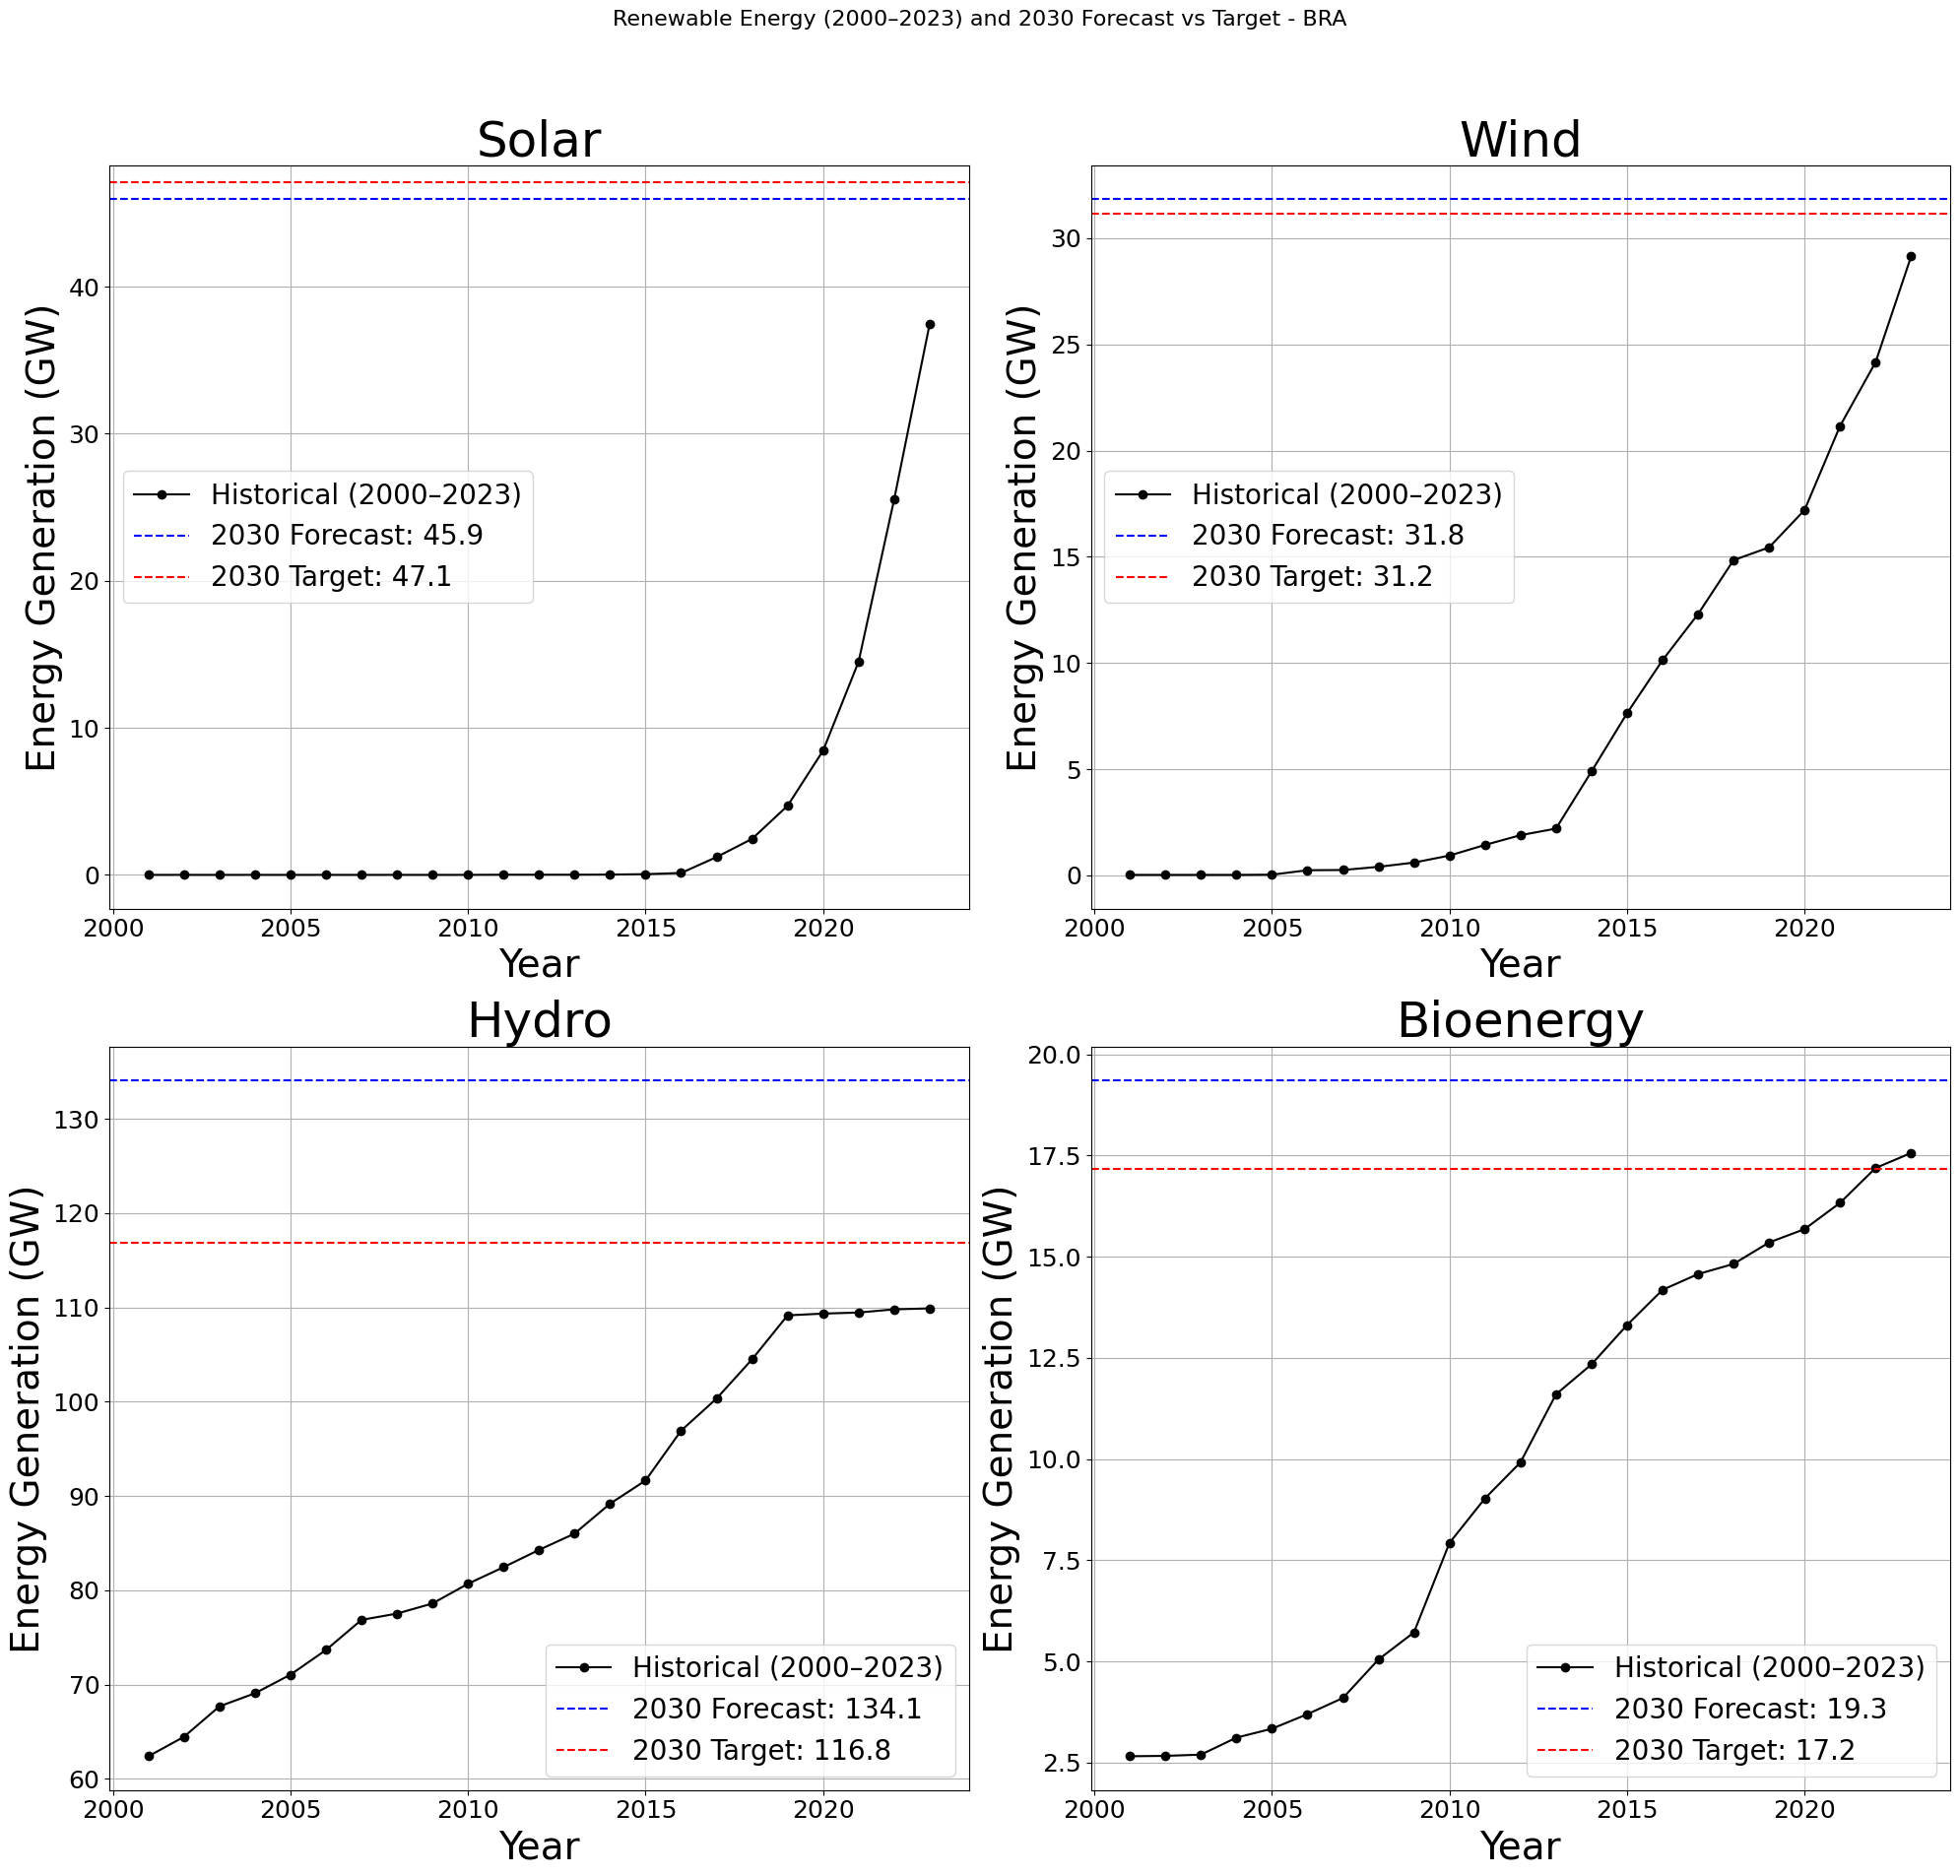

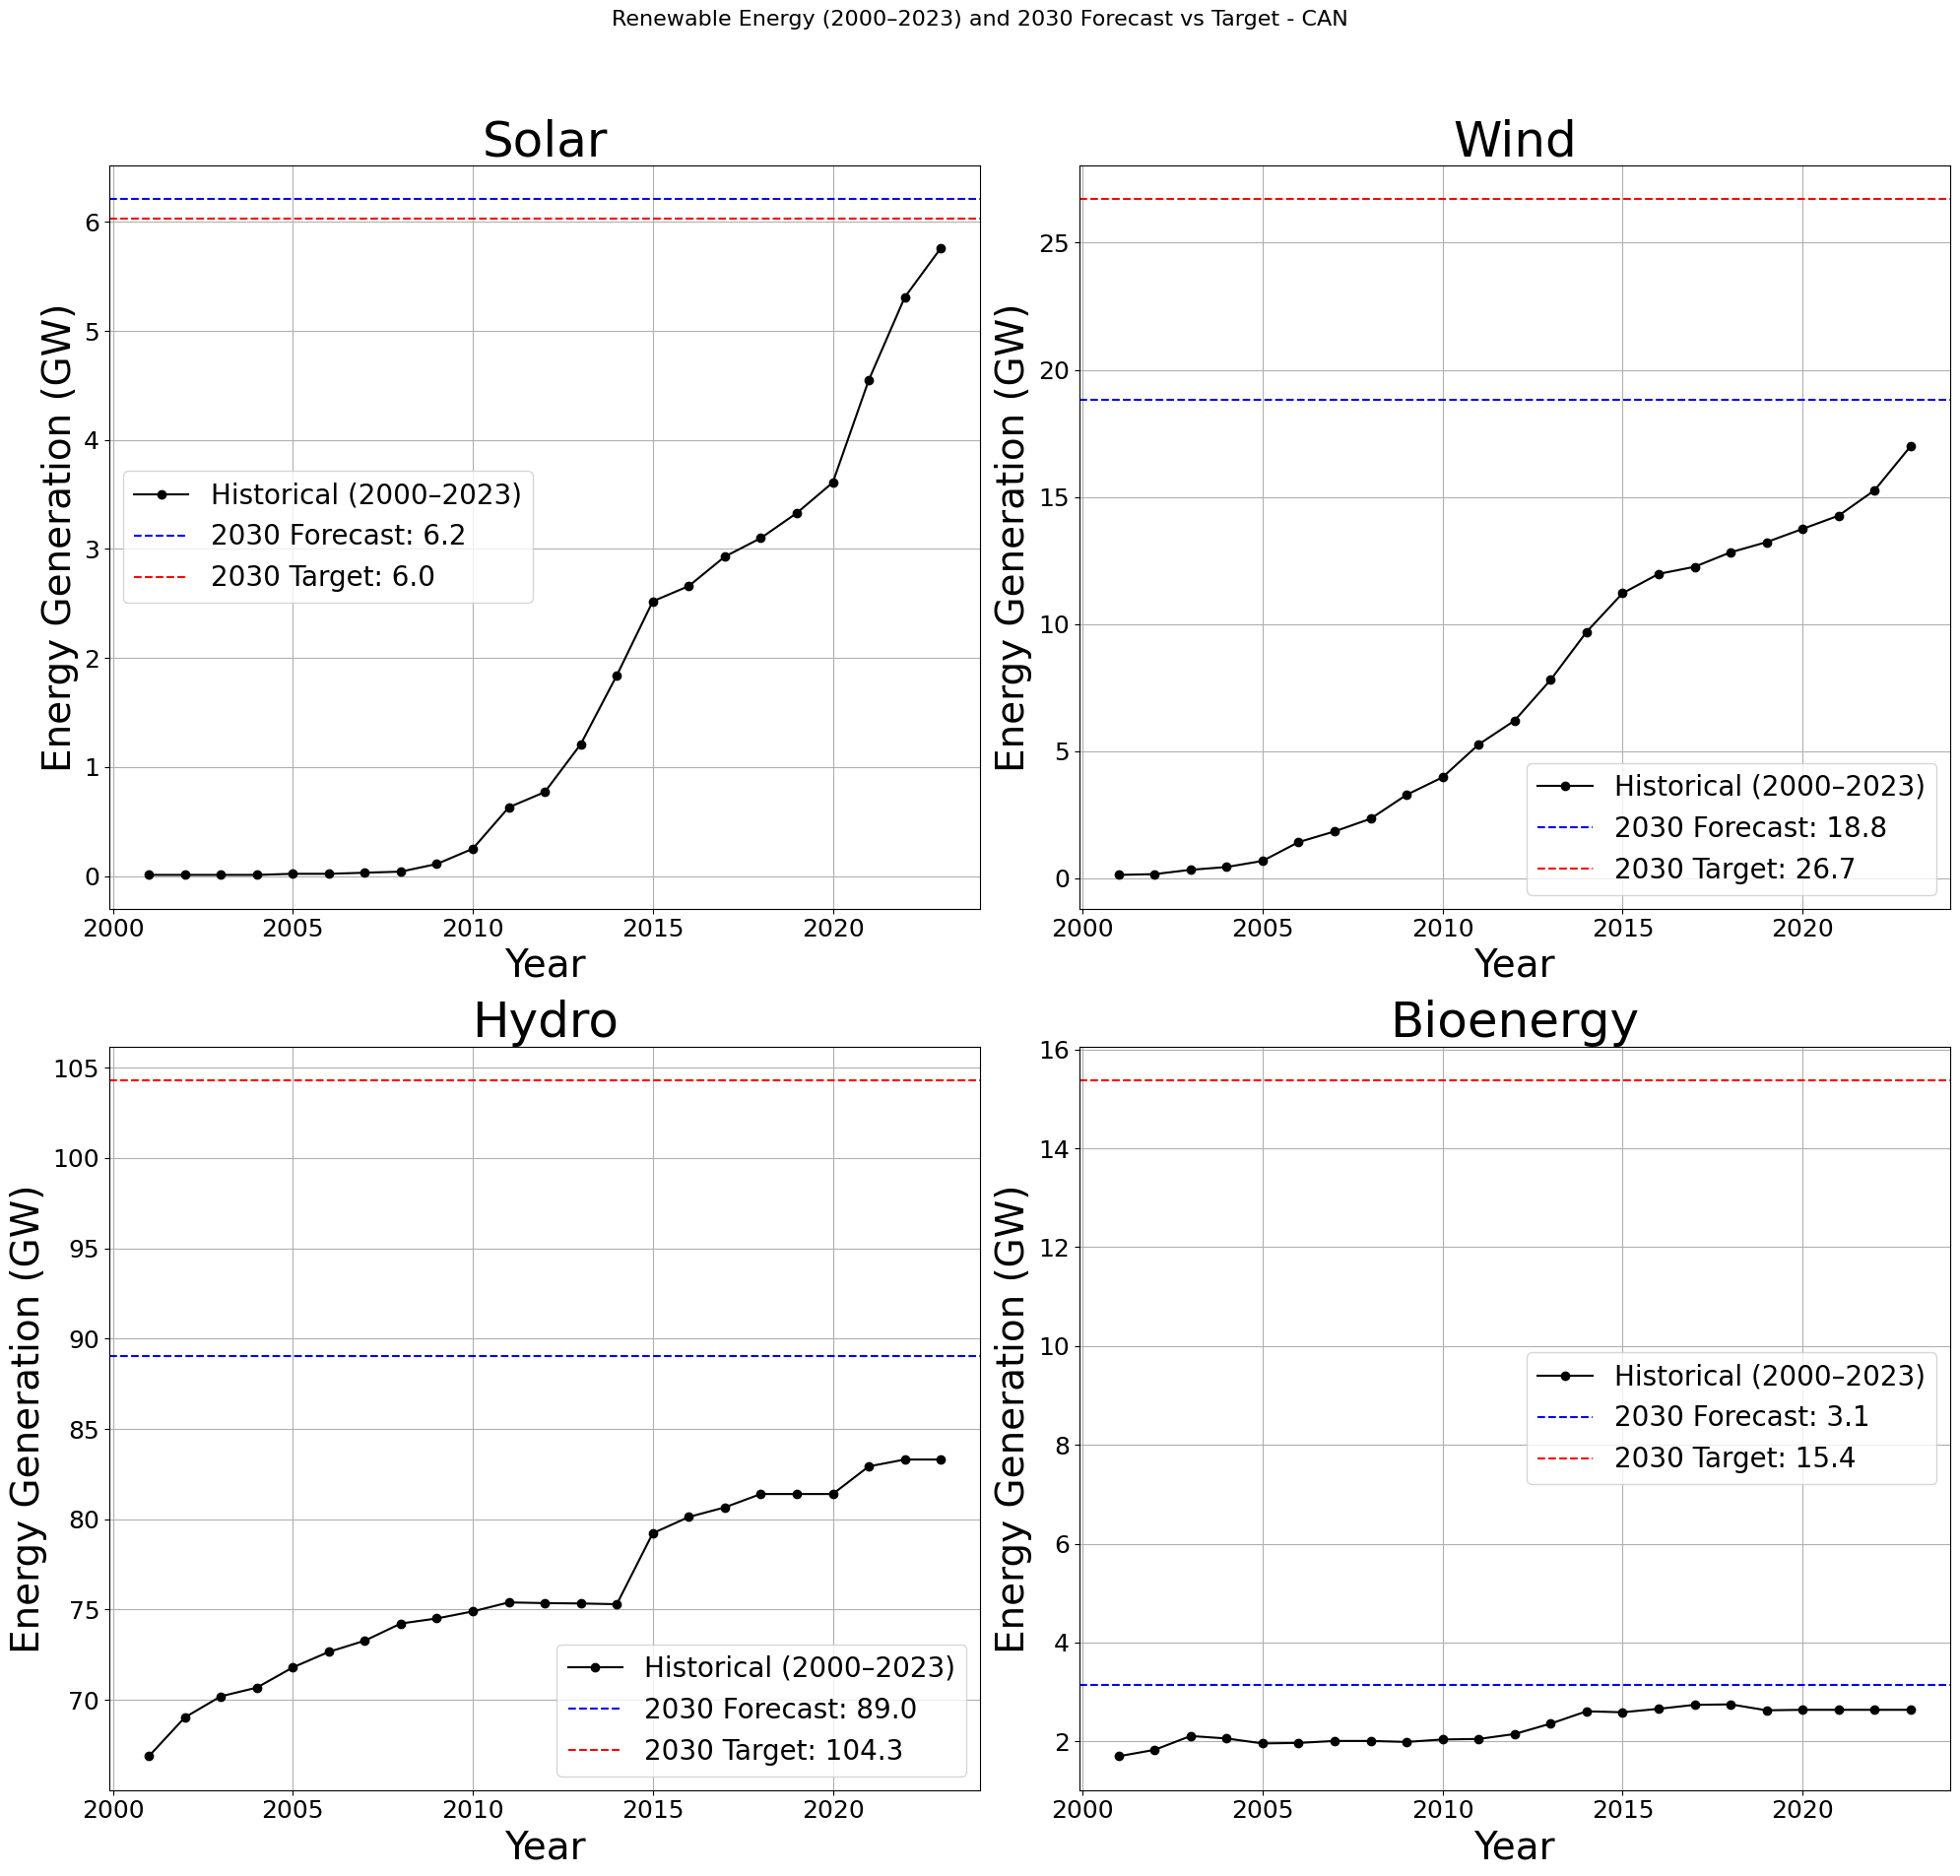

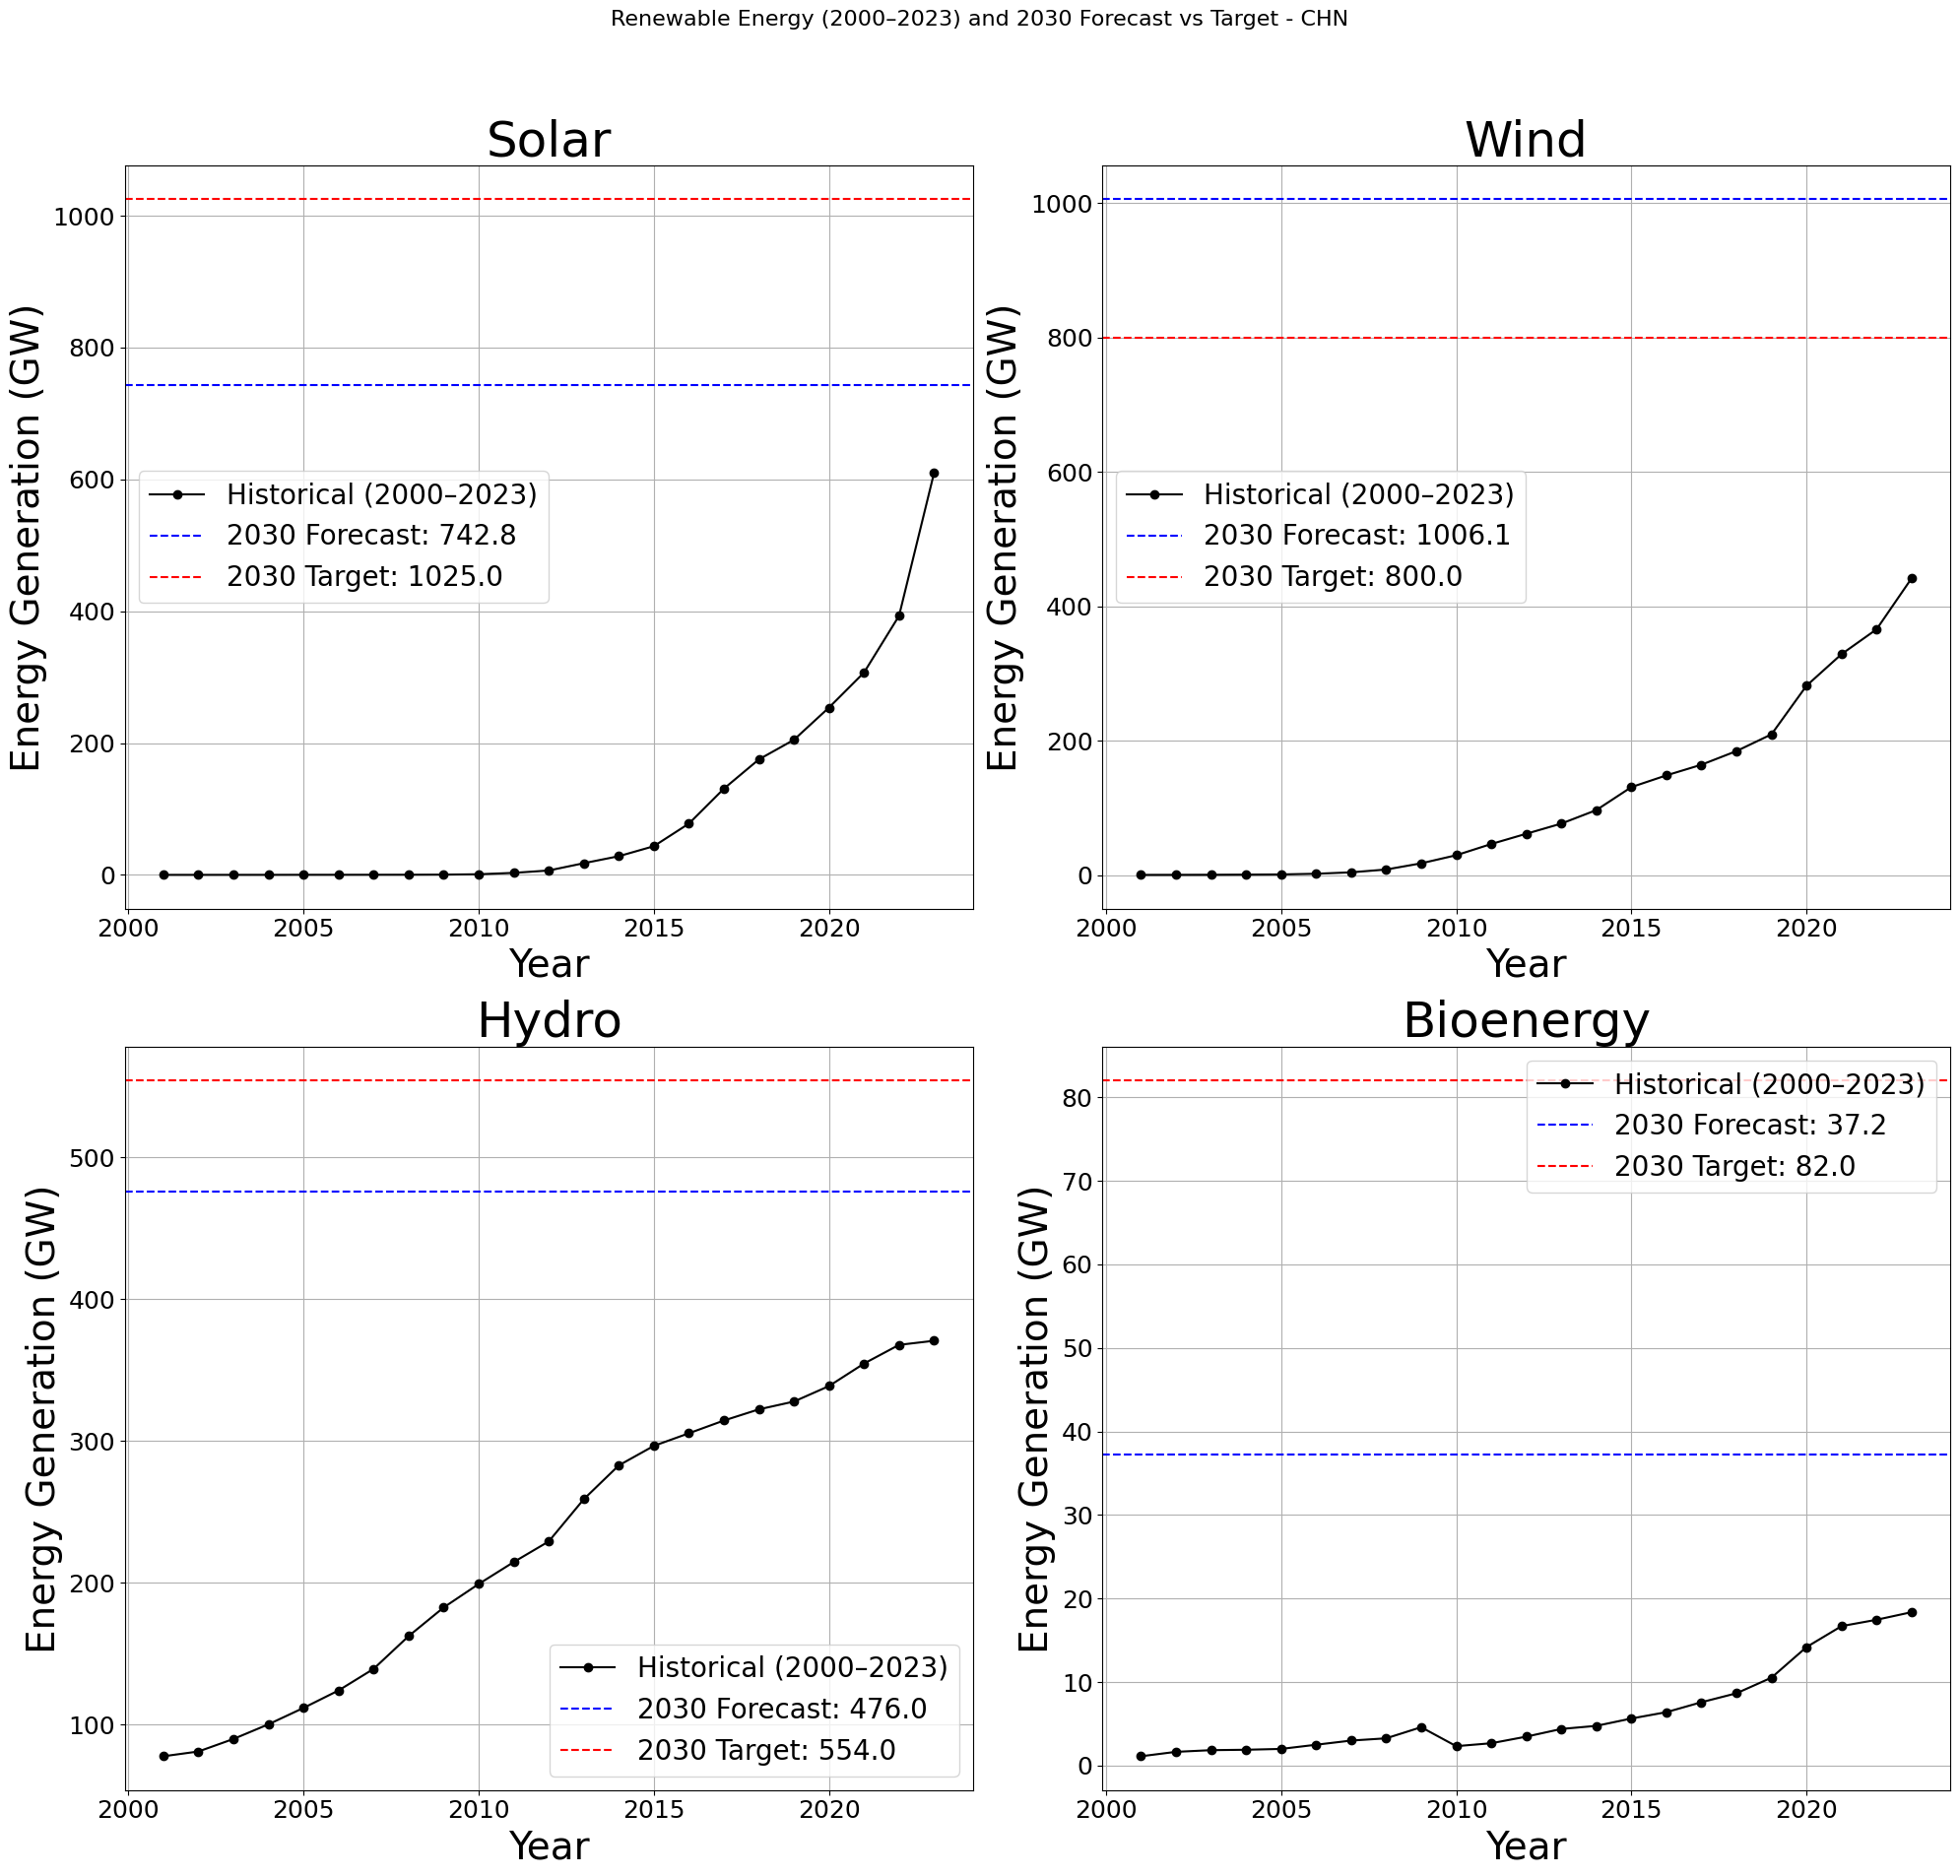

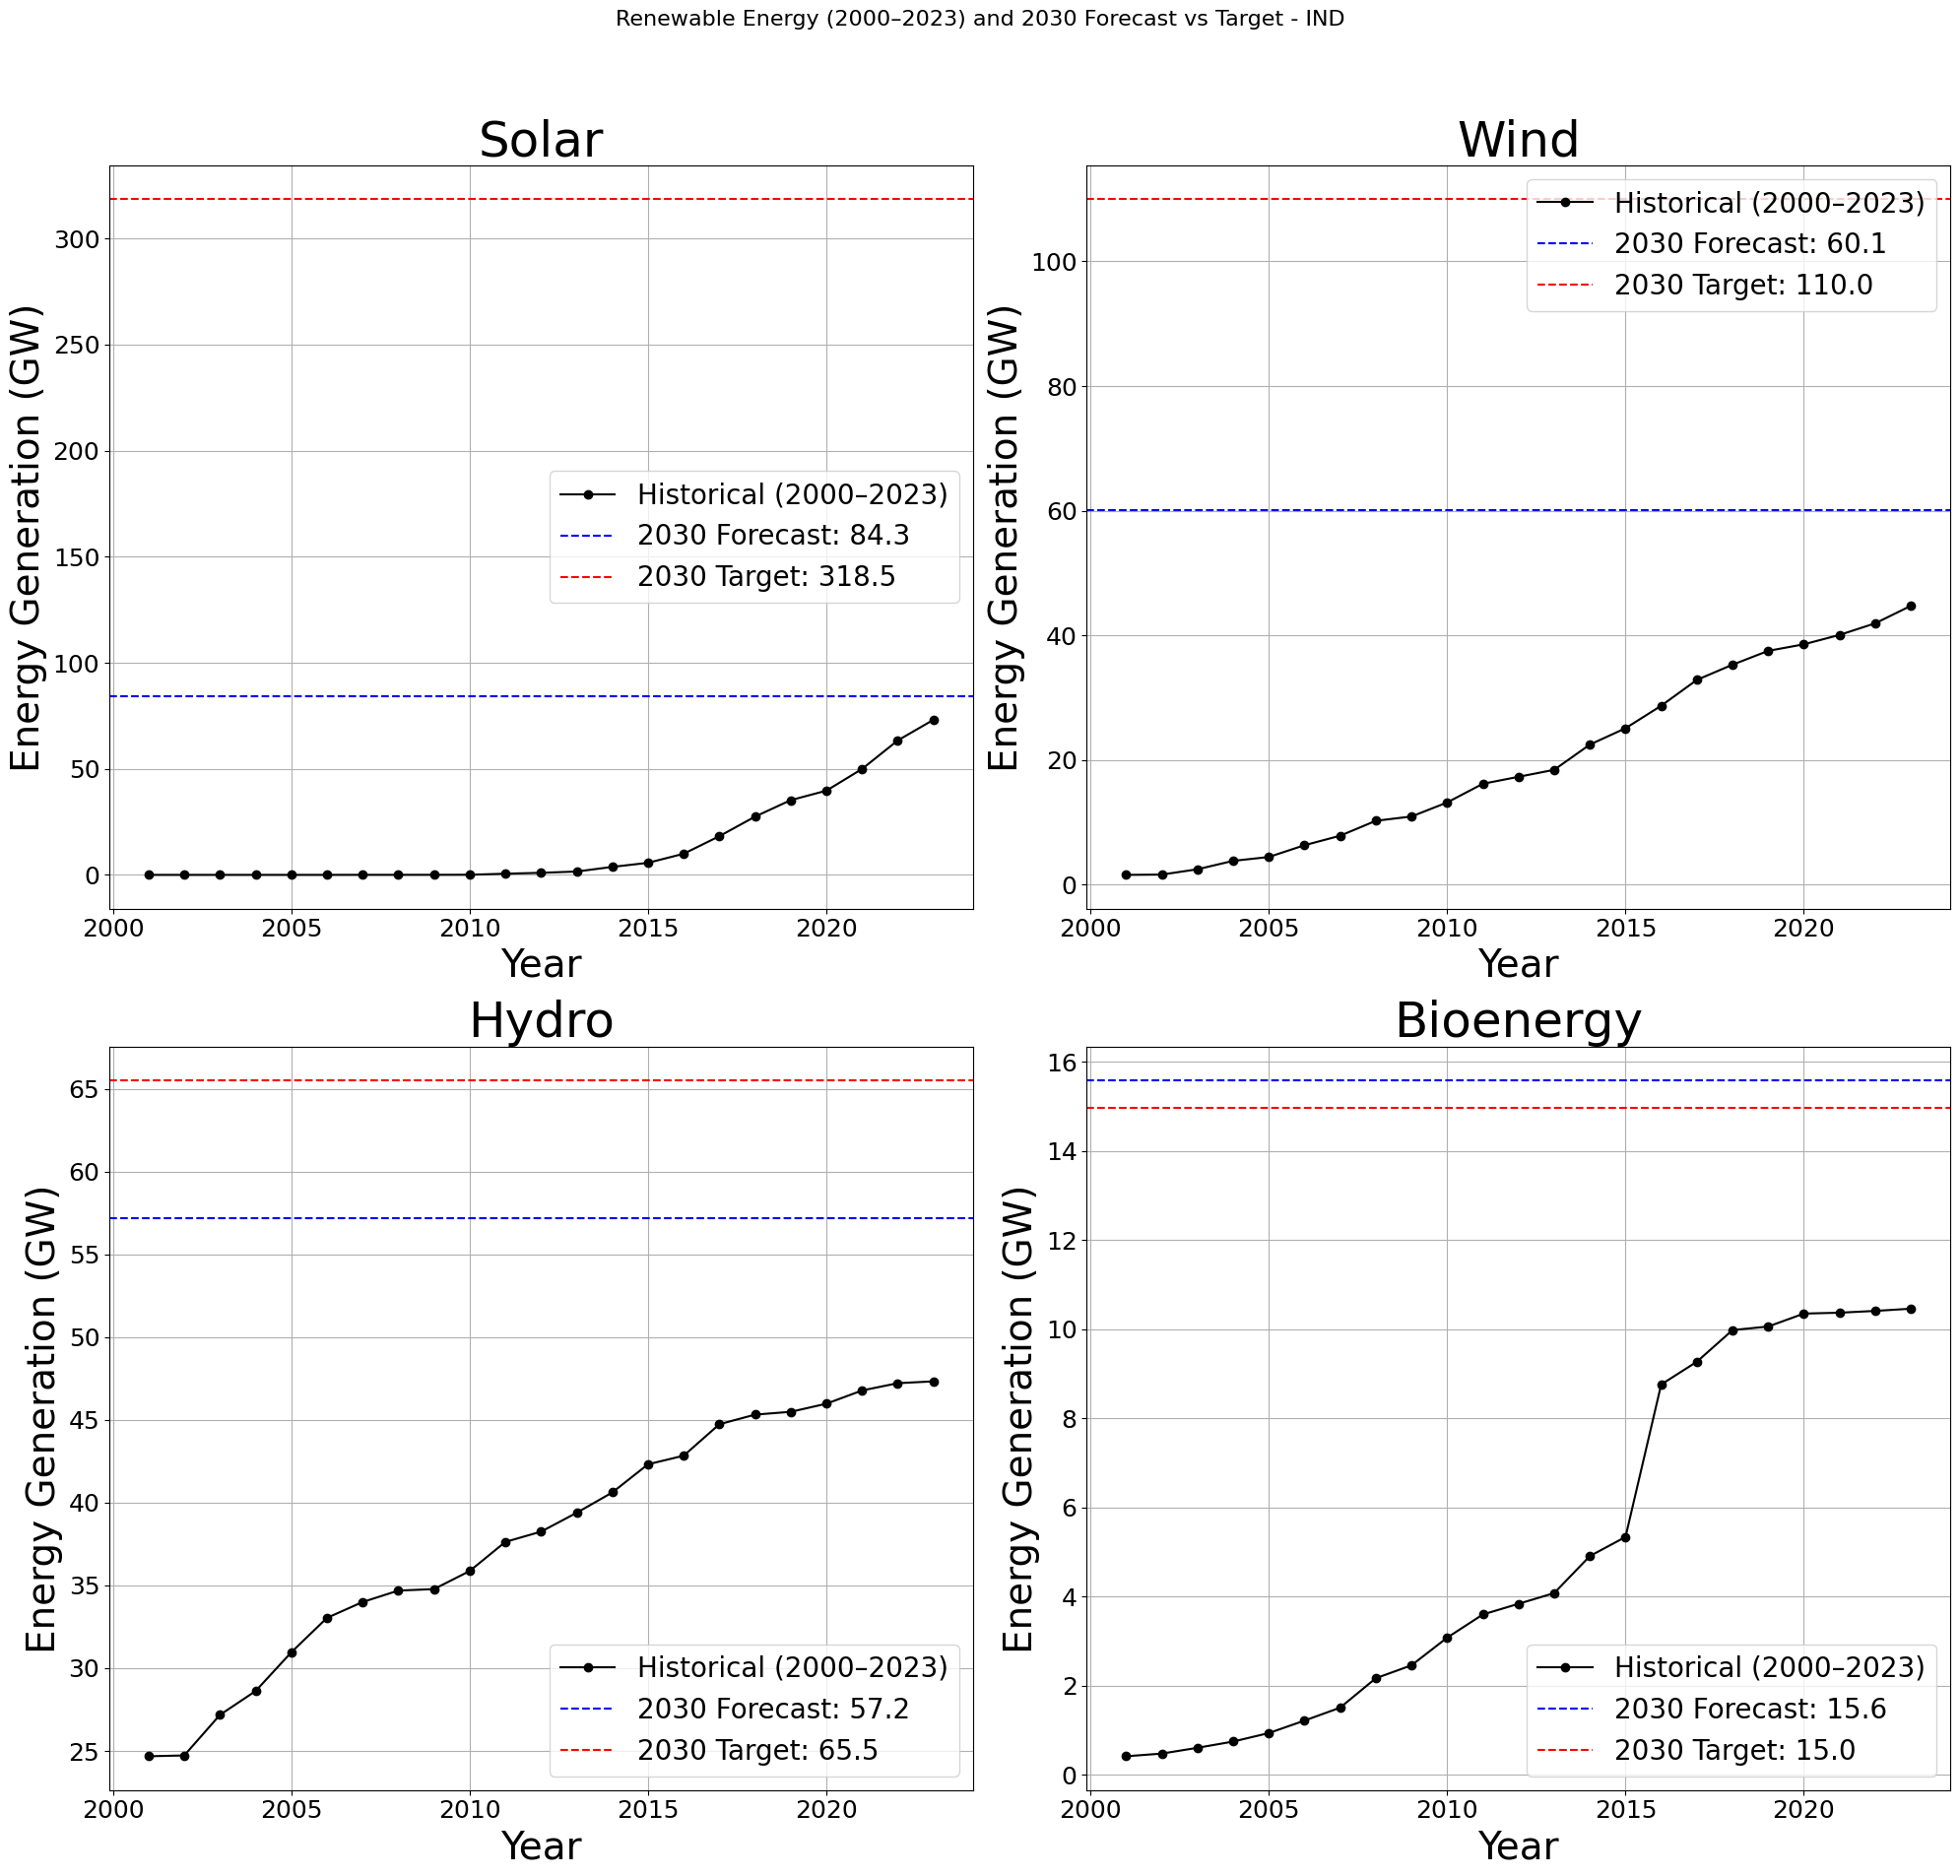

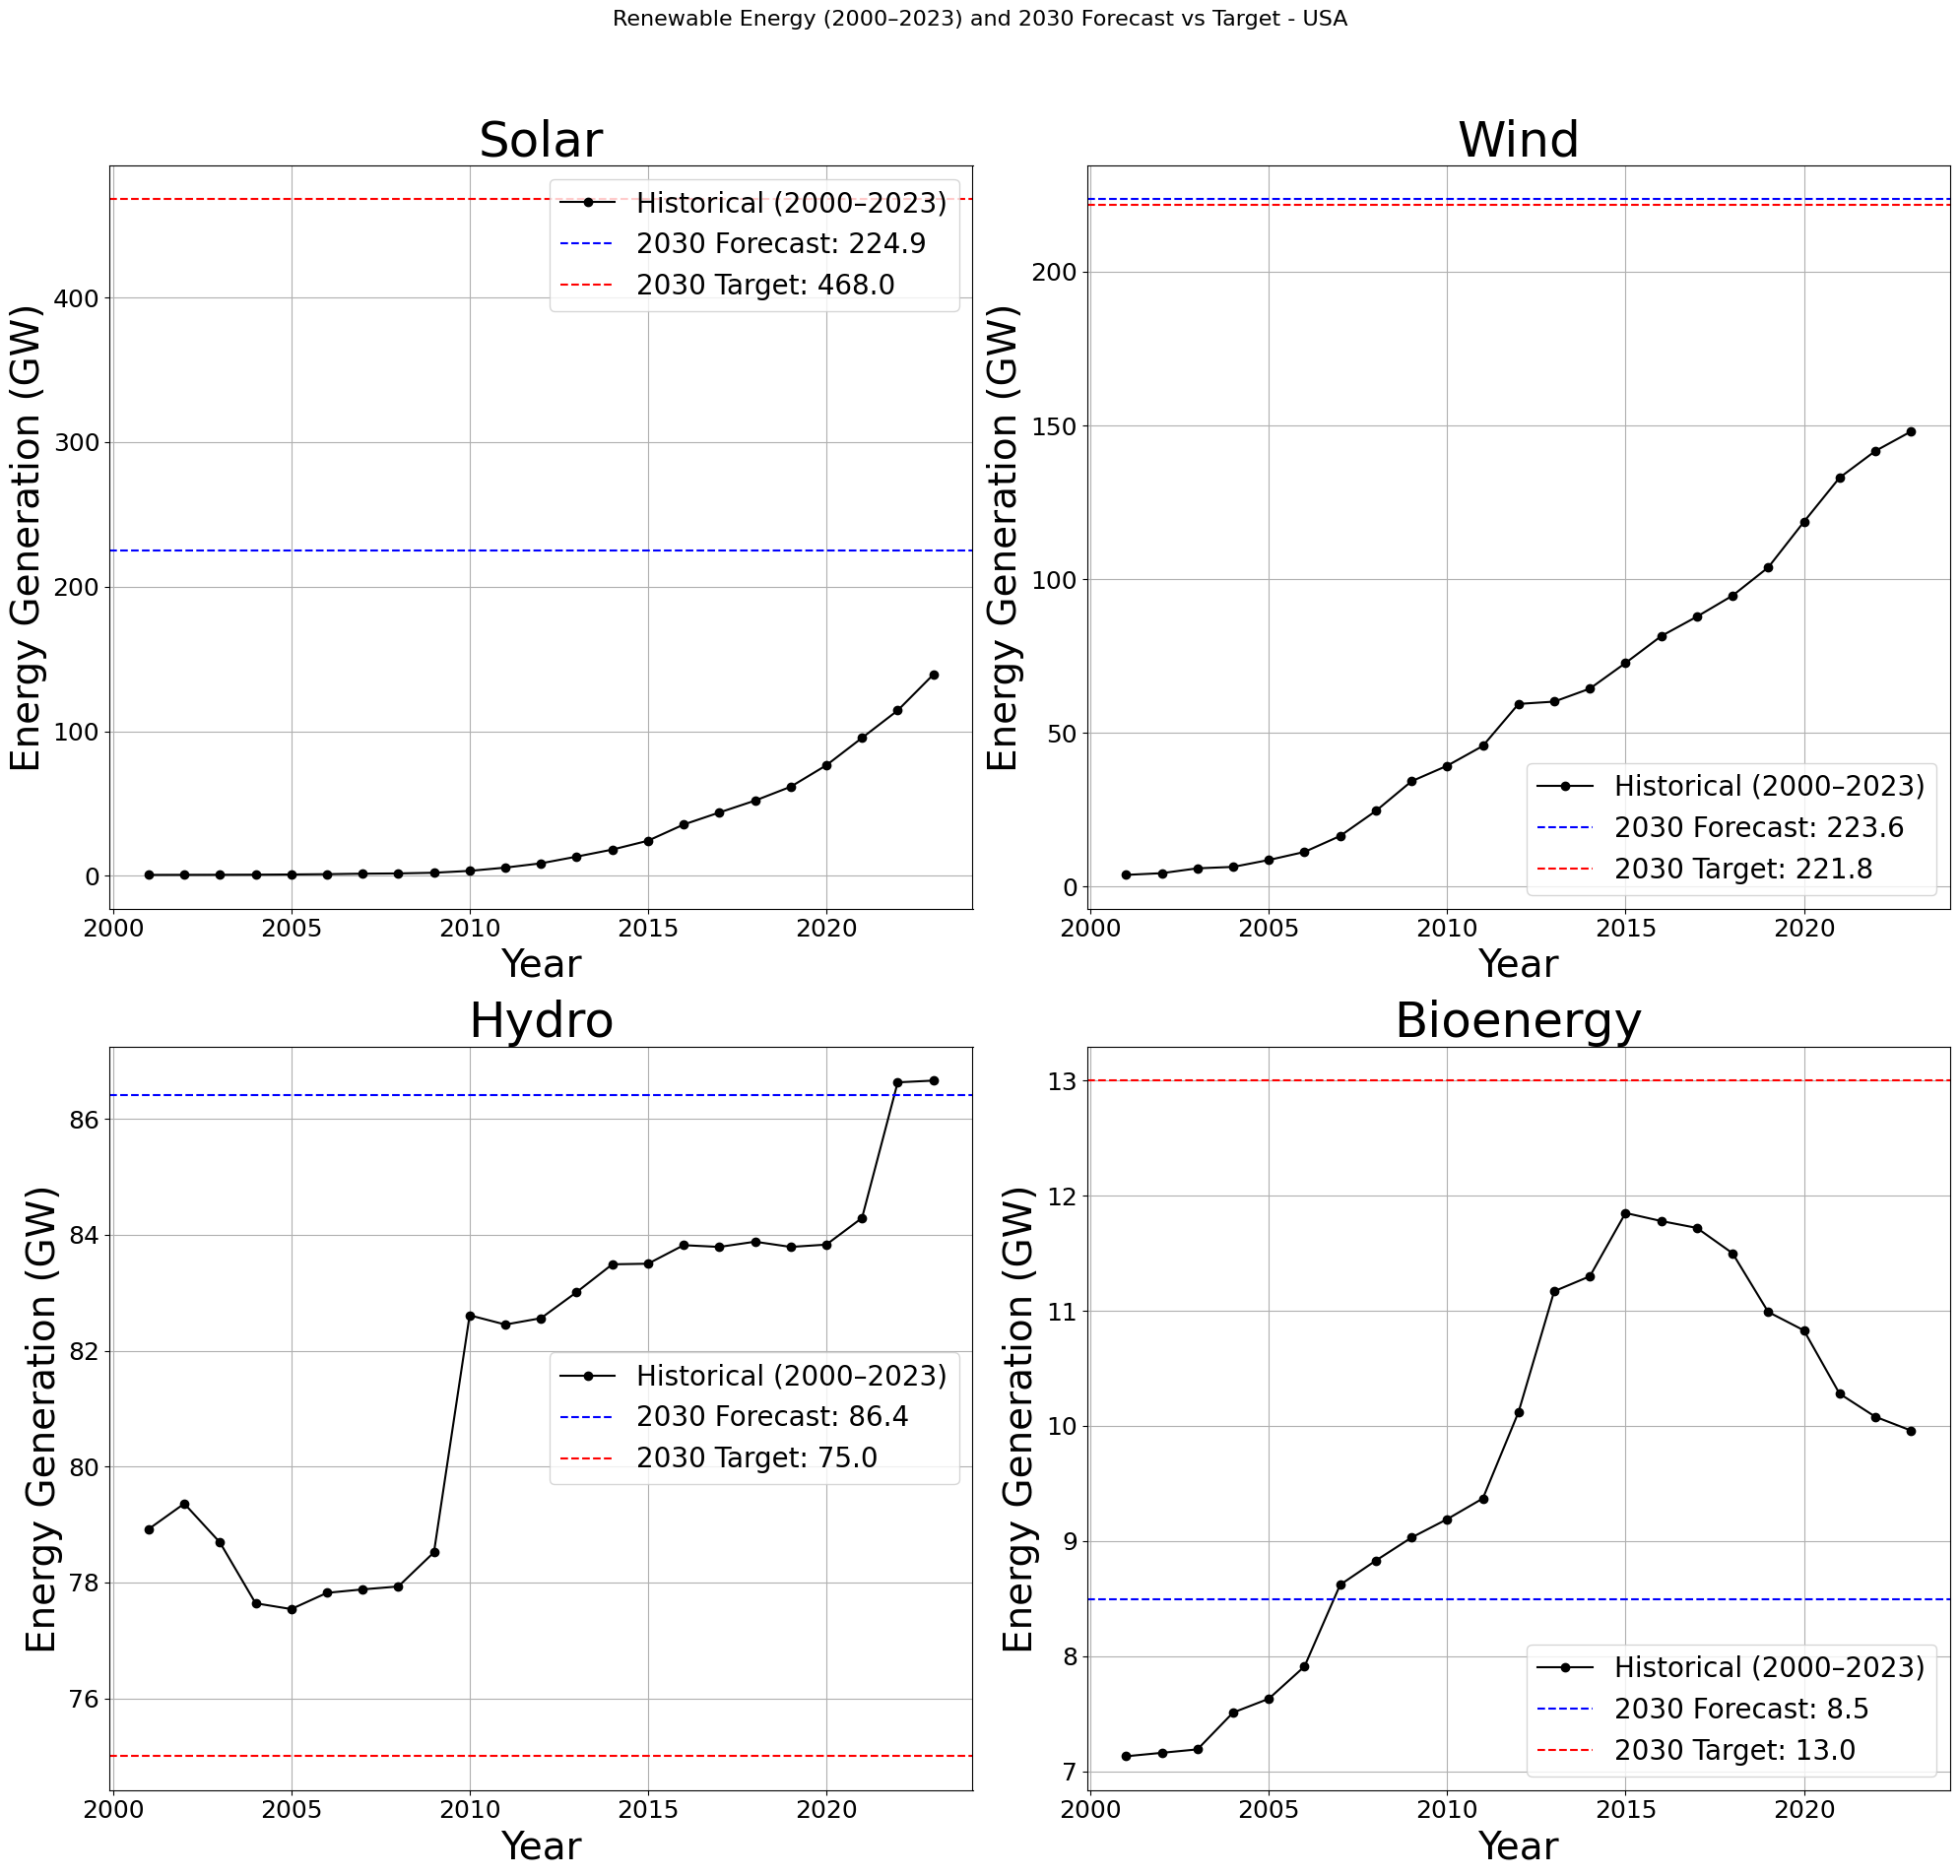

In [9]:
import matplotlib.pyplot as plt


df = historical_df.copy()

for country in countries:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f"Renewable Energy (2000–2023) and 2030 Forecast vs Target - {country}", fontsize=16)

    energy_plot_info = [
        ('Solar Unit Value', 'Solar'),
        ('Wind Unit Value', 'Wind'),
        ('Hydro Unit Value', 'Hydro'),
        ('Bioenergy Unit Value', 'Bioenergy')
    ]

    for idx, (energy_col, energy_label) in enumerate(energy_plot_info):
        ax = axes[idx // 2][idx % 2]

        # Filter historical data for the country
        country_data = df[(df["Country code"] == country) & (df["Year"].between(2000, 2023))]

        if not country_data.empty:
            ax.plot(
                country_data["Year"],
                country_data[energy_col],
                marker='o',
                linestyle='-',
                color='black',
                label='Historical (2000–2023)'
            )
        else:
            print(f"No historical data for {country} - {energy_label}")

        # Add 2030 Forecast
        forecast_val = None
        if country in forecast_2030_results and energy_col in forecast_2030_results[country]:
            result = forecast_2030_results[country][energy_col]
            if "Forecast" in result:
                forecast_val = result["Forecast"]
                ax.axhline(y=forecast_val, color='blue', linestyle='--', label=f"2030 Forecast: {forecast_val:.1f}")

        # Add 2030 Target
        actual_row = target_2030[target_2030["country_code"] == country]
        if not actual_row.empty and energy_col in actual_row.columns:
            actual_val = actual_row[energy_col].values[0]
            ax.axhline(y=actual_val, color='red', linestyle='--', label=f"2030 Target: {actual_val:.1f}")

        ax.set_title(energy_label, fontsize=12)
        ax.set_xlabel("Year")
        ax.set_ylabel("Unit Value")
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()




# Descriptive Statistical Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load datasets
df_predictive = pd.read_csv("/content/df_predictive_model.csv")
target1 = pd.read_csv("/content/target1.csv")

# Drop missing values for accurate analysis
df_predictive.dropna(inplace=True)

# Define energies and region pair for t-tests
energy_types = ["Bioenergy", "Solar", "Wind",'Hydro']
region_pair = ("North America", "Asia")
regions = df_predictive["Ember region"].unique()

# Initialize results dictionary
test_results = {}

# Loop through each energy type
for energy in energy_types:
    energy_col = f"{energy} Unit Value"

    # T-Test between two specific regions
    group1 = df_predictive[df_predictive["Ember region"] == region_pair[0]][energy_col]
    group2 = df_predictive[df_predictive["Ember region"] == region_pair[1]][energy_col]
    t_stat, t_pvalue = stats.ttest_ind(group1, group2, equal_var=False)
    test_results[f"T-Test {energy}"] = {"T-Statistic": t_stat, "P-Value": t_pvalue}

    # ANOVA across all regions
    anova_groups = [df_predictive[df_predictive["Ember region"] == region][energy_col] for region in regions]
    anova_stat, anova_pvalue = stats.f_oneway(*anova_groups)
    test_results[f"ANOVA {energy}"] = {"F-Statistic": anova_stat, "P-Value": anova_pvalue}

# Pearson Correlation: Between Solar and Wind Energy
pearson_corr, pearson_pvalue = stats.pearsonr(
    df_predictive["Solar Unit Value"], df_predictive["Wind Unit Value"]
)
test_results["Pearson Correlation"] = {
    "Correlation Coefficient": pearson_corr,
    "P-Value": pearson_pvalue
}

# Linear Regression: Predicting Wind Energy from Solar Energy
X = df_predictive["Solar Unit Value"].values.reshape(-1, 1)
y = df_predictive["Wind Unit Value"].values
slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)

test_results["Linear Regression"] = {
    "R-Squared": r_value**2,
    "P-Value": p_value
}

# Print summary
print("\nStatistical Test Results:")
for test, result in test_results.items():
    print(f"\n{test}:")
    for key, value in result.items():
        print(f"  {key}: {value}")


Statistical Test Results:

T-Test Bioenergy:
  T-Statistic: 0.3316916871722291
  P-Value: 0.7409238913640621

ANOVA Bioenergy:
  F-Statistic: 6.64841068698228
  P-Value: 0.0018688148090835266

T-Test Solar:
  T-Statistic: -2.1786196190174265
  P-Value: 0.033972874884275146

ANOVA Solar:
  F-Statistic: 4.447796460561832
  P-Value: 0.013842769088281526

T-Test Wind:
  T-Statistic: -1.9990966005618551
  P-Value: 0.05017615967499532

ANOVA Wind:
  F-Statistic: 5.753182942694315
  P-Value: 0.004184138593149881

T-Test Hydro:
  T-Statistic: -3.0634709459986005
  P-Value: 0.0036824273938766074

ANOVA Hydro:
  F-Statistic: 6.349607543461507
  P-Value: 0.002442535915501802

Pearson Correlation:
  Correlation Coefficient: 0.9503234996577399
  P-Value: 4.166020055521942e-59

Linear Regression:
  R-Squared: 0.9031147540017337
  P-Value: 4.166020055523632e-59


# Clustering Analysis (# 3 Clusters)

In [ ]:
df=pd.read_csv('/content/df_filtered2.csv')

In [ ]:

df_pivot = df.pivot_table(
    index=["Country code", "Year"],
    columns="Variable",
    values="Value",
    aggfunc="sum"
).reset_index().fillna(0)

In [ ]:
renewables = ["Solar", "Wind", "Hydro", "Bioenergy"]
non_renewables = ["Coal", "Gas", "Nuclear", "Other Fossil"]

df_pivot["Renewable_Total"] = df_pivot[renewables].sum(axis=1)
df_pivot["Non_Renewable_Total"] = df_pivot[non_renewables].sum(axis=1)

In [ ]:
import numpy as np

# Calculate Renewable_Share
df_pivot['Renewable_Share'] = (
    df_pivot[renewables].sum(axis=1) / (df_pivot['Renewable_Total'] + df_pivot['Non_Renewable_Total'])
) * 100

# Fill NaN/Inf if Total_Energy is 0
df_pivot['Renewable_Share'] = df_pivot['Renewable_Share'].replace([np.inf, -np.inf], 0).fillna(0)

In [ ]:
# Calculate Fossil_Dependence
df_pivot['Fossil_Dependence'] = (
    df_pivot[non_renewables].sum(axis=1) / (df_pivot['Renewable_Total'] + df_pivot['Non_Renewable_Total'])
) * 100

# Handle division errors
df_pivot['Fossil_Dependence'] = df_pivot['Fossil_Dependence'].replace([np.inf, -np.inf], 0).fillna(0)

In [ ]:
# Aggregate time-series metrics per country
country_features = df_pivot.groupby('Country code').agg({
    'Renewable_Total': ['mean', 'std', lambda x: np.polyfit(range(len(x)), x, 1)[0]],  # Trend slope
    'Non_Renewable_Total': ['mean', 'std'],
    'Solar': ['max', 'mean'],
    'Wind': ['max', 'mean'],
    'Coal': ['mean', lambda x: np.mean(np.diff(x))],  # Coal change rate
    'Gas': ['mean', 'std']
})

# Flatten multi-index columns
country_features.columns = ['_'.join(col).strip() for col in country_features.columns.values]
country_features.rename(columns={
    'Renewable_Total_<lambda_0>': 'Renewable_Trend',
    'Coal_<lambda_0>': 'Coal_Change_Rate'
}, inplace=True)

# Add final year values
last_year = df_pivot['Year'].max()
final_values = df_pivot[df_pivot['Year'] == last_year].set_index('Country code')[
    ['Renewable_Share', 'Fossil_Dependence']
]
country_features = country_features.merge(final_values, left_index=True, right_index=True)

In [ ]:
country_features

,Renewable_Total_mean,Renewable_Total_std,Renewable_Trend,Non_Renewable_Total_mean,Non_Renewable_Total_std,Solar_max,Solar_mean,Wind_max,Wind_mean,Coal_mean,Coal_Change_Rate,Gas_mean,Gas_std,Renewable_Share,Fossil_Dependence
Country code,,,,,,,,,,,,,,,
ARG,10.894348,2.182354,0.288241,20.455217,5.484166,1.41,0.223913,3.71,0.711739,0.390435,0.005455,14.928261,3.872414,36.386535,63.613465
AUS,19.843043,14.407521,1.900435,47.707391,5.026837,33.68,7.637391,11.33,3.962609,28.014348,-0.270909,17.710000,6.306763,50.937559,49.062441
AUT,17.296957,3.699414,0.529279,5.473478,0.975302,6.83,1.049565,3.98,1.816087,1.058261,-0.084545,3.832609,1.327805,81.975844,18.024156
BEL,5.149565,4.541640,0.647984,14.760435,1.682335,8.55,2.506087,5.50,1.901739,1.138261,-0.111818,7.716957,0.564973,57.269231,42.730769
BGR,3.286522,1.387652,0.197668,8.845652,0.576792,2.94,0.668696,0.70,0.430435,5.485217,-0.023182,1.167826,0.039767,42.778542,57.221458
BRA,108.152174,37.222024,5.256245,23.920000,6.280276,37.45,4.109130,29.14,7.171304,2.320870,0.082273,12.829130,3.157692,85.813470,14.186530
CAN,87.396087,12.735974,1.859585,43.816087,1.770503,5.76,1.683913,16.99,7.185217,12.583478,-0.628636,15.936087,4.667592,71.180669,28.819331
CHE,15.133043,2.497361,0.335949,3.911304,0.176360,5.84,1.276087,0.09,0.046522,0.000000,0.000000,0.186957,0.074127,85.974868,14.025132
CHL,8.684783,4.478551,0.593350,9.053043,2.631008,8.47,1.363043,4.51,0.955217,3.493913,0.096364,3.800000,0.682056,65.144455,34.855545


In [ ]:
# Fill missing trends with 0
country_features = country_features.fillna(0)

# Remove countries with insufficient data
min_years = 8  # Require at least 3 years of data
country_counts = df_pivot['Country code'].value_counts()
valid_countries = country_counts[country_counts >= min_years].index
country_features = country_features.loc[valid_countries]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select features for clustering
features = country_features[[
    'Renewable_Total_mean', 'Renewable_Trend',
    'Non_Renewable_Total_mean', 'Coal_Change_Rate',
    'Renewable_Share', 'Fossil_Dependence'
]]


"\n# Scale and cluster\nscaler = StandardScaler()\nscaled_features = scaler.fit_transform(features)\n\nkmeans = KMeans(n_clusters=4, random_state=42)  # Adjust cluster count as needed\ncountry_features['Cluster'] = kmeans.fit_predict(scaled_features)"

In [ ]:
# 1. Reset index to make 'Country code' a column
country_features = country_features.reset_index()




In [ ]:
df_pivot = df.pivot_table(
    index=["Country code", "Year"],
    columns="Variable",
    values="Value",
    aggfunc="sum"
).reset_index().fillna(0)

In [ ]:
df_pivot[df_pivot['Country code'] == 'ARG']

Variable,Country code,Year,Bioenergy,Coal,Gas,Hydro,Nuclear,Other Fossil,Other Renewables,Solar,Wind
0,ARG,2001,0.12,0.38,10.23,8.64,1.00,0.50,0.0,0.00,0.00
1,ARG,2002,0.13,0.38,10.74,8.79,1.00,0.32,0.0,0.00,0.00
2,ARG,2003,0.16,0.38,10.86,8.81,1.00,0.44,0.0,0.00,0.00
3,ARG,2004,0.16,0.38,10.86,8.93,1.00,1.43,0.0,0.00,0.00
4,ARG,2005,0.16,0.38,10.86,8.95,1.00,1.78,0.0,0.00,0.00
5,ARG,2006,0.17,0.38,10.86,8.95,1.00,2.44,0.0,0.00,0.00
6,ARG,2007,0.19,0.38,10.86,9.19,1.00,3.64,0.0,0.00,0.00
7,ARG,2008,0.19,0.38,11.54,9.19,1.00,4.27,0.0,0.00,0.00
8,ARG,2009,0.20,0.38,11.66,9.57,1.00,3.45,0.0,0.00,0.00
9,ARG,2010,0.21,0.38,14.13,9.57,1.00,5.15,0.0,0.00,0.00


In [ ]:
# 3 clusters

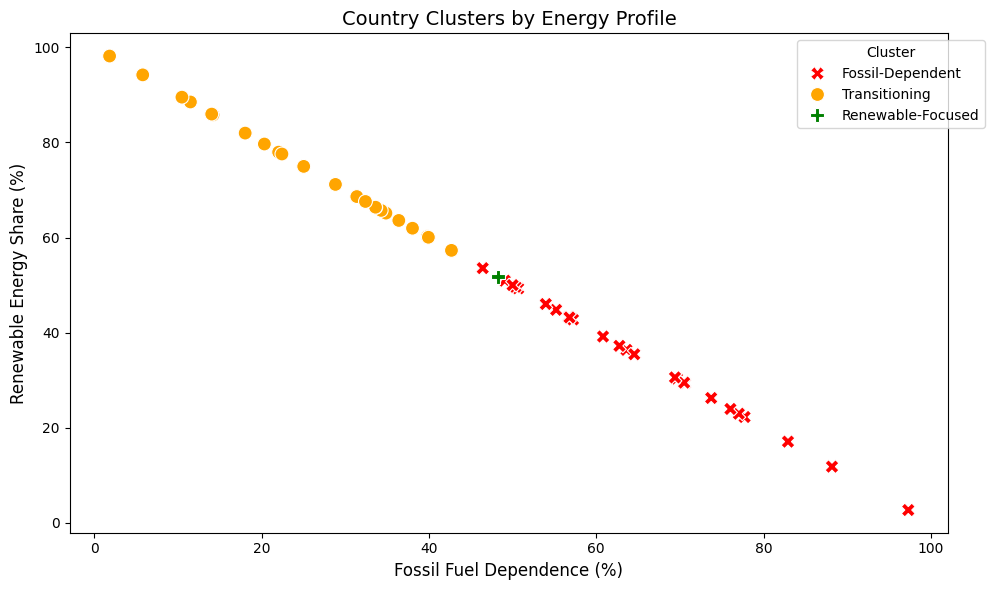

| Cluster           |   Count | Avg_Fossil_Dependence   | Avg_Renewable_Share   | Avg_Renewable_Trend   | Top_Countries              |
|:------------------|--------:|:------------------------|:----------------------|:----------------------|:---------------------------|
| Fossil-Dependent  |      26 | 64.5%                   | 35.5%                 | 1.58 units/yr         | ARG, AUS, BGR, CYP, CZE... |
| Transitioning     |      24 | 26.4%                   | 73.6%                 | 0.99 units/yr         | AUT, BEL, BRA, CAN, CHE... |
| Renewable-Focused |       1 | 48.2%                   | 51.8%                 | 52.39 units/yr        | CHN                        |


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load  preprocessed data
#country_features = pd.read_csv('/content/country_features_final.csv')

# Select key features for clustering
X = country_features[['Fossil_Dependence', 'Renewable_Share', 'Renewable_Trend']]

# Standardize features (critical for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
country_features['Cluster'] = kmeans.fit_predict(X_scaled)

# Label clusters based on centroid analysis
cluster_profiles = {
    0: "Fossil-Dependent",
    1: "Transitioning",
    2: "Renewable-Focused"
}
country_features['Cluster'] = country_features['Cluster'].map(cluster_profiles)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_features,
    x='Fossil_Dependence',
    y='Renewable_Share',
    hue='Cluster',
    palette={'Fossil-Dependent': 'red', 'Transitioning': 'orange', 'Renewable-Focused': 'green'},
    s=100,
    style='Cluster',
    markers={'Fossil-Dependent': 'X', 'Transitioning': 'o', 'Renewable-Focused': 'P'}
)
plt.title('Country Clusters by Energy Profile', fontsize=14)
plt.xlabel('Fossil Fuel Dependence (%)', fontsize=12)
plt.ylabel('Renewable Energy Share (%)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Generate automated cluster profiles
def generate_cluster_profiles(df):
    profiles = []
    for cluster in ['Fossil-Dependent', 'Transitioning', 'Renewable-Focused']:
        cluster_data = df[df['Cluster'] == cluster]
        profile = {
            'Cluster': cluster,
            'Count': len(cluster_data),
            'Avg_Fossil_Dependence': f"{cluster_data['Fossil_Dependence'].mean():.1f}%",
            'Avg_Renewable_Share': f"{cluster_data['Renewable_Share'].mean():.1f}%",
            'Avg_Renewable_Trend': f"{cluster_data['Renewable_Trend'].mean():.2f} units/yr",
            'Top_Countries': ', '.join(cluster_data.index[:5]) + '...' if len(cluster_data) > 5 else ', '.join(cluster_data.index)
        }
        profiles.append(profile)
    return pd.DataFrame(profiles)

# Display cluster profiles
cluster_profiles_df = generate_cluster_profiles(country_features.set_index('Country code'))
print(cluster_profiles_df.to_markdown(index=False))

In [ ]:
import plotly.express as px

fig = px.scatter(
    country_features,
    x='Fossil_Dependence',
    y='Renewable_Share',
    color='Cluster',
    color_discrete_map={'Fossil-Dependent': 'red', 'Transitioning': 'orange', 'Renewable-Focused': 'green'},
    hover_name='Country code',
    text='Country code',
    symbol='Cluster',
    size_max=15
)

fig.update_traces(
    textposition='top center',
    marker=dict(size=12),
    textfont=dict(size=8)
)

fig.update_layout(
    title='Interactive Country Energy Profiles',
    xaxis_title='Fossil Fuel Dependence (%)',
    yaxis_title='Renewable Energy Share (%)',
    hovermode='closest'
)

fig.show()

In [ ]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
silhouette_scores = cross_val_score(kmeans, scaled_features, cv=kfold, scoring=lambda estimator, X: silhouette_score(X, estimator.fit_predict(X)))
print(f"\nSilhouette Scores (Cross-validation): {silhouette_scores}")
print(f"Average Silhouette Score: {silhouette_scores.mean()}")


# Other clustering metrics
labels = kmeans.labels_

silhouette_avg = silhouette_score(scaled_features, labels)
print(f"\nSilhouette Score: {silhouette_avg}")

calinski_harabasz = calinski_harabasz_score(scaled_features, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")



Silhouette Scores (Cross-validation): [0.28467964 0.46131137 0.41712409 0.46349944 0.6201524 ]
Average Silhouette Score: 0.44935338880990033

Silhouette Score: 0.4432821836373548
Calinski-Harabasz Index: 68.23472517351706
Davies-Bouldin Index: 0.5726341818380736
